# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропущенные значения</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения-ceiling_height" data-toc-modified-id="Пропущенные-значения-ceiling_height-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Пропущенные значения <code>ceiling_height</code></a></span></li><li><span><a href="#Пропущенные-значения-floors_total" data-toc-modified-id="Пропущенные-значения-floors_total-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Пропущенные значения <code>floors_total</code></a></span></li><li><span><a href="#Пропущенные-значения-living_area" data-toc-modified-id="Пропущенные-значения-living_area-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Пропущенные значения <code>living_area</code></a></span></li><li><span><a href="#Пропущенные-значения-is_apartment" data-toc-modified-id="Пропущенные-значения-is_apartment-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Пропущенные значения <code>is_apartment</code></a></span></li><li><span><a href="#Пропущенные-значения-kitchen_area" data-toc-modified-id="Пропущенные-значения-kitchen_area-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Пропущенные значения <code>kitchen_area</code></a></span></li><li><span><a href="#Пропущенные-значения-balcony" data-toc-modified-id="Пропущенные-значения-balcony-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Пропущенные значения <code>balcony</code></a></span></li><li><span><a href="#Пропущенные-значения-locality_name" data-toc-modified-id="Пропущенные-значения-locality_name-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Пропущенные значения <code>locality_name</code></a></span></li><li><span><a href="#Пропущенные-значения-airports_nearest,-cityCenters_nearest" data-toc-modified-id="Пропущенные-значения-airports_nearest,-cityCenters_nearest-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Пропущенные значения <code>airports_nearest</code>, <code>cityCenters_nearest</code></a></span></li><li><span><a href="#Пропущенные-значения-parks_around3000,-ponds_around3000" data-toc-modified-id="Пропущенные-значения-parks_around3000,-ponds_around3000-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Пропущенные значения <code>parks_around3000</code>, <code>ponds_around3000</code></a></span></li><li><span><a href="#Пропущенные-значения-parks_nearest,-ponds_nearest" data-toc-modified-id="Пропущенные-значения-parks_nearest,-ponds_nearest-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Пропущенные значения <code>parks_nearest</code>, <code>ponds_nearest</code></a></span></li><li><span><a href="#Пропущенные-значения-parks_nearest,-ponds_nearest" data-toc-modified-id="Пропущенные-значения-parks_nearest,-ponds_nearest-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Пропущенные значения <code>parks_nearest</code>, <code>ponds_nearest</code></a></span></li><li><span><a href="#Выводы-по-пропущенным-значениям" data-toc-modified-id="Выводы-по-пропущенным-значениям-2.1.12"><span class="toc-item-num">2.1.12&nbsp;&nbsp;</span>Выводы по пропущенным значениям</a></span></li></ul></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Неявные-дубликаты-в-столбце-locality_name" data-toc-modified-id="Неявные-дубликаты-в-столбце-locality_name-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Неявные дубликаты в столбце <code>locality_name</code></a></span></li><li><span><a href="#Аномалии-в-данных" data-toc-modified-id="Аномалии-в-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Аномалии в данных</a></span><ul class="toc-item"><li><span><a href="#Аномальные-значения-в-столбце-ceiling_height" data-toc-modified-id="Аномальные-значения-в-столбце-ceiling_height-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Аномальные значения в столбце <code>ceiling_height</code></a></span></li><li><span><a href="#Аномальные-значения-в-столбце-last_price" data-toc-modified-id="Аномальные-значения-в-столбце-last_price-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Аномальные значения в столбце <code>last_price</code></a></span></li><li><span><a href="#Аномальные-значения-в-столбце-rooms" data-toc-modified-id="Аномальные-значения-в-столбце-rooms-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Аномальные значения в столбце <code>rooms</code></a></span></li><li><span><a href="#Выводы-по-аномальным-значениям" data-toc-modified-id="Выводы-по-аномальным-значениям-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Выводы по аномальным значениям</a></span></li></ul></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Цена-одного-квадратного-метра" data-toc-modified-id="Цена-одного-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена одного квадратного метра</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Год-публикации-объявления" data-toc-modified-id="Год-публикации-объявления-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Год публикации объявления</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-километрах" data-toc-modified-id="Расстояние-до-центра-города-в-километрах-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Расстояние до центра города в километрах</a></span></li></ul></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»)" data-toc-modified-id="Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»)-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Тип этажа квартиры («первый», «последний», «другой»)</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме" data-toc-modified-id="Общее-количество-этажей-в-доме-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Общее количество этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах" data-toc-modified-id="Расстояние-до-центра-города-в-метрах-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Расстояние до центра города в метрах</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#День-и-месяц-публикации-объявления" data-toc-modified-id="День-и-месяц-публикации-объявления-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>День и месяц публикации объявления</a></span></li><li><span><a href="#Скорость-продажи-квартир" data-toc-modified-id="Скорость-продажи-квартир-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Скорость продажи квартир</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</a></span><ul class="toc-item"><li><span><a href="#Зависимость-стоимости-от-общей-площади" data-toc-modified-id="Зависимость-стоимости-от-общей-площади-4.15.1"><span class="toc-item-num">4.15.1&nbsp;&nbsp;</span>Зависимость стоимости от общей площади</a></span></li><li><span><a href="#Зависимость-стоимости-от-жилой-площади" data-toc-modified-id="Зависимость-стоимости-от-жилой-площади-4.15.2"><span class="toc-item-num">4.15.2&nbsp;&nbsp;</span>Зависимость стоимости от жилой площади</a></span></li><li><span><a href="#Зависимость-стоимости-от-площади-кухни" data-toc-modified-id="Зависимость-стоимости-от-площади-кухни-4.15.3"><span class="toc-item-num">4.15.3&nbsp;&nbsp;</span>Зависимость стоимости от площади кухни</a></span></li><li><span><a href="#Зависимость-стоимости-от-количества-комнат" data-toc-modified-id="Зависимость-стоимости-от-количества-комнат-4.15.4"><span class="toc-item-num">4.15.4&nbsp;&nbsp;</span>Зависимость стоимости от количества комнат</a></span></li><li><span><a href="#Зависимость-стоимости-от-типа-этажа,-на-котором-расположена-квартира" data-toc-modified-id="Зависимость-стоимости-от-типа-этажа,-на-котором-расположена-квартира-4.15.5"><span class="toc-item-num">4.15.5&nbsp;&nbsp;</span>Зависимость стоимости от типа этажа, на котором расположена квартира</a></span></li><li><span><a href="#Зависимость-стоимости-от-даты-размещения-(день-недели,-месяц,-год)" data-toc-modified-id="Зависимость-стоимости-от-даты-размещения-(день-недели,-месяц,-год)-4.15.6"><span class="toc-item-num">4.15.6&nbsp;&nbsp;</span>Зависимость стоимости от даты размещения (день недели, месяц, год)</a></span></li><li><span><a href="#Попарный-коэффициент-корреляции" data-toc-modified-id="Попарный-коэффициент-корреляции-4.15.7"><span class="toc-item-num">4.15.7&nbsp;&nbsp;</span>Попарный коэффициент корреляции</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.15.8"><span class="toc-item-num">4.15.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Средняя-цена-за-квадратный-метр-в-10-населенных-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Средняя-цена-за-квадратный-метр-в-10-населенных-пунктах-с-наибольшим-числом-объявлений-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Средняя цена за квадратный метр в 10 населенных пунктах с наибольшим числом объявлений</a></span></li><li><span><a href="#Зависимость-стоимости-от-расстояния-до-центра-города" data-toc-modified-id="Зависимость-стоимости-от-расстояния-до-центра-города-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>Зависимость стоимости от расстояния до центра города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим информацию о данных, представленных в датасете.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Числовые данные содержатся в колонках total_images, last_price, total_area, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest, days_exposition. Колонки studio, open_plan содержат булевый тип данных. Колонки first_day_exposition и locality_name содержат строковые данные.

Построим гистограммы для всех числовых столбцов.

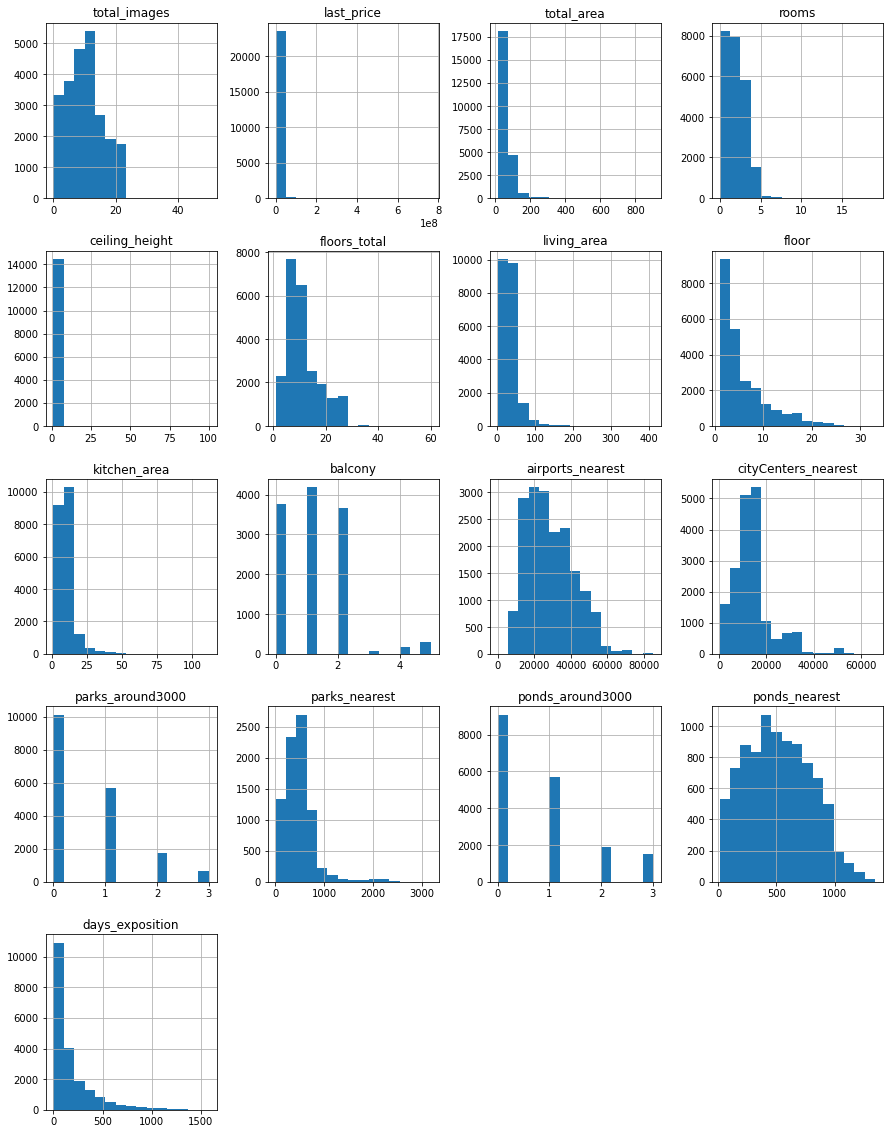

In [6]:
data.hist(figsize=(15, 20), bins=15);

Подозрительно выглядят гистограммы last_price и ceiling_height. Есть ощущение, что в данных есть какие-то выбросы, которые мешают нормально построить гистограмму. С выбросами будем работать дальше.

### Предобработка данных

#### Пропущенные значения

Сначала проверим, в каких столбцах есть пропущенные значения.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения есть в следующих колонках:
- ceiling_height 
- floors_total
- living_area
- is_apartment
- kitchen_area 
- balcony
- locality_name 
- airports_nearest 
- cityCenters_nearest  
- parks_around3000     
- parks_nearest      
- ponds_around3000    
- ponds_nearest  
- days_exposition  

Рассмотрим каждую колонку по отдельности и примем решение о возможных способах заполнения пропусков.

##### Пропущенные значения `ceiling_height`

`ceiling_height` — высота потолков (м). <br>
Пропущенные данные, скорее всего, говорят о том, что пользователь не знает точную высоту потолков. <br>
Посмотрим на средние значения по этому параметру.

In [8]:
# среднее
data['ceiling_height'].mean()

2.77149889685604

In [9]:
# медиана
data['ceiling_height'].median()

2.65

Предлагаю заменить пропуски медианным значением, потому что оно более устойчиво к выбросам в данных.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

##### Пропущенные значения `floors_total`

`floors_total` — всего этажей в доме. <br>
пропущенных значений мало, скорее всего, это просто ошибка заполнения. Удалим строчки с пропусками.

In [11]:
data = data.drop(data[data['floors_total'].isna()].index)

##### Пропущенные значения `living_area`

`living_area` — жилая площадь в квадратных метрах (м²).<br>
Пропуски могли возникнуть из-за того, что пользователь не знал точную жилую площадь и не вписал ее.<br>
Заполнить можно медианными значениями, но нужно иметь в виду, что размер жилой площади зависит от общей площади и количества комнат, т.е. мы не можем использовать медианное значение по всем данным. <br>
Предлагаю заполнять пропущенные данные в несколько этапов. <br>

Сначала сгруппируем по количеству комнат и общей площади. Такая группировка обуславливается тем, что есть типовые дома и квартиры, т.е. мы можем попытаться восстановить жилую площадь, ориентируясь на квартиры с такими же характеристиками.

In [12]:
data.groupby(['rooms', 'total_area'])['living_area'].median().head(20)

rooms  total_area
0      15.50         10.00
       16.00         13.00
       17.00         12.00
       18.00         16.00
       18.80         15.80
       19.00         15.00
       19.50         12.70
       20.00         16.00
       20.50         15.65
       21.00         13.50
       21.30         18.00
       21.40           NaN
       22.00         15.00
       22.20         16.60
       22.30         18.00
       22.50         20.00
       22.70         17.00
       23.00         18.00
       23.06         18.00
       23.30         16.10
Name: living_area, dtype: float64

Теперь сгруппируем отдельно по общей площади.

In [13]:
data.groupby(['total_area'])['living_area'].median()

total_area
12.0      10.0
13.0      10.0
13.2       NaN
14.0      11.0
15.0       NaN
         ...  
590.0    409.0
618.0    258.0
631.0      NaN
631.2    322.3
900.0    409.7
Name: living_area, Length: 2160, dtype: float64

Теперь сгруппируем по количеству комнат.

In [14]:
data.groupby(['rooms'])['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.500
5      91.785
6     124.400
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

Мы могли бы считать, что группировка по количеству комнат похожа на категоризацию данных об общей площади и заполнить пропуски этими медианными значениями, но проблема в том, что жилая площадь не должна превышать общую площадь. Если у нас есть однокомнатная квартира с площадью 13.2 квадратных метров, то будет заведомо неверно заполнить пропуск медианным значением для однокомнатных квартир.

Сначала заполняем пропуски медианными значениями по группировкам по количеству комнат и общей площади - условные типовые квартиры.

In [15]:
data['living_area'] = data['living_area'].fillna(data.groupby(['rooms', 'total_area'])['living_area'].transform('median'))

Посмотрим, сколько пропусков осталось заполнить.

In [16]:
data['living_area'].isna().sum()

199

Теперь попробуем заполнить пропуски медианным значением по общей площади.

In [17]:
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area'])['living_area'].transform('median'))

Дальше смотрим, какие пропуски остались незаполненными.

In [18]:
data[data['living_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
360,6,4990000.0,57.84,2018-08-22T00:00:00,2,2.65,27.0,NaN,13,NaN,False,False,10.19,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,60.0
802,5,8045000.0,73.08,2018-11-10T00:00:00,2,2.70,12.0,NaN,12,NaN,False,False,10.69,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1307,20,26558000.0,152.38,2017-01-11T00:00:00,5,2.75,17.0,NaN,12,NaN,False,False,14.61,5.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,625.0
1388,20,59800000.0,399.00,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
1464,6,21500000.0,122.50,2017-11-07T00:00:00,3,3.00,15.0,NaN,8,NaN,False,False,12.00,2.0,Санкт-Петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,69.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,2.65,9.0,NaN,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
1638,16,10665000.0,67.77,2018-08-04T00:00:00,2,2.75,20.0,NaN,6,NaN,False,False,15.30,2.0,Санкт-Петербург,39357.0,10581.0,2.0,288.0,3.0,311.0,90.0
1770,10,2566270.0,42.07,2018-12-13T00:00:00,1,2.65,15.0,NaN,8,NaN,False,False,11.11,NaN,посёлок Новогорелово,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1832,4,3055000.0,32.84,2018-03-28T00:00:00,1,2.65,24.0,NaN,2,NaN,False,False,11.05,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,80.0
1879,10,3753180.0,64.71,2018-12-12T00:00:00,1,2.65,15.0,NaN,9,NaN,False,False,12.20,NaN,посёлок Новогорелово,NaN,NaN,NaN,NaN,NaN,NaN,12.0


Оставшиеся пропуски заполним медианным значением по количеству комнат.

In [19]:
data['living_area'] = data['living_area'].fillna(data.groupby(['rooms'])['living_area'].transform('median'))

Проверим, остались ли пропуски.

In [20]:
data['living_area'].isna().sum()

0

Вспомним, что ранее мы сказали, что жилая площадь не должна превышать общую площадь. Проверим, так ли это в наших данных после того, как мы заполнили пропуски.

In [21]:
data[data['living_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12040,5,1900000.0,15.0,2018-06-27T00:00:00,1,2.50,5.0,17.6,1,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16949,9,1550000.0,15.0,2018-08-21T00:00:00,1,2.70,9.0,17.6,1,NaN,False,False,NaN,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,2.65,5.0,17.6,1,NaN,False,False,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
22356,6,2050000.0,17.2,2019-01-13T00:00:00,1,2.77,23.0,17.6,1,False,False,False,NaN,NaN,Санкт-Петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7.0


Нашлось 4 строчки, где после подстановки жилая площадь оказалась больше общей площади. Предлагаю исправить их вручную. Данные возьмем из уже известных нам медианных значений по данным, сгруппированным по общей площади, только возьмем медиану, соответствующую ближайшей общей площади.

In [22]:
data.groupby(['total_area'])['living_area'].median().head(10)

total_area
12.0    10.0
13.0    10.0
13.2    17.6
14.0    11.0
15.0    17.6
15.5    10.0
16.0    13.0
17.0    12.5
17.2    17.6
17.6    15.0
Name: living_area, dtype: float64

In [23]:
data.loc[12040, 'living_area'] = 10.0
data.loc[16949, 'living_area'] = 10.0
data.loc[19558, 'living_area'] = 10.0
data.loc[22356, 'living_area'] = 12.5

In [24]:
data[data['living_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [25]:
data.groupby(['total_area'])['living_area'].median().head(10)

total_area
12.0    10.0
13.0    10.0
13.2    10.0
14.0    11.0
15.0    10.0
15.5    10.0
16.0    13.0
17.0    12.5
17.2    12.5
17.6    15.0
Name: living_area, dtype: float64

##### Пропущенные значения `is_apartment`

`is_apartment` — апартаменты (булев тип). <br>
Кажется логичным предположить, что пропущенные данные в этом случае на самом деле означают отсутствие признака, т.е. продаваемый объект недвижимости не является апартаментами. <br>
Заполним пропуски значением `False`.

In [26]:
data['is_apartment'] = data['is_apartment'].fillna(False)

##### Пропущенные значения `kitchen_area`

`kitchen_area` — площадь кухни в квадратных метрах (м²). <br>
Пропущенные данные в этой колонке могут объясняться разными причинами, например:
- пользователь не знает точную площадь кухни, поэтому он ее не указал;
- в квартире нет кухни.

Рассмотрим второй вариант: если в квартре нет кухни, то заполнять пропуски не имеет смысла. Стандартным примером отсутствия кухни в квартире являются студии или квартиры с открытой планировкой. Подтверждается ли это данными?

In [27]:
print('Доля пропусков в столбце kitchen_area среди квартир-студий:', data.query('studio == True or open_plan == True')['kitchen_area'].isna().sum()/len(data.query('studio == True or open_plan == True')))

Доля пропусков в столбце kitchen_area среди квартир-студий: 1.0


In [28]:
len(data.query('studio == True or open_plan == True'))

213

Как мы и предполагали: в студиях нет кухонь, поэтому нельзя указать площадь кухни. Однако, пропусков в этом столбце гораздо больше, чем квартир-студий в данных: 2278 пропусков и 216 студий/квартир с открытой планировкой. Будет ли разумным считать, что во всех остальных случаях в квартирах тоже нет кухонь? Это кажется странным.

Предлагаю заполнить остальные пропуски медианным значением. Однако, кажется, что площадь кухни может зависеть и от других характеристик, например, количества комнат в квартире или общей площади квартиры (аналогично жилой площади). Сравним, например, медиану по всем данным с медианами по разным группам данных.

In [29]:
# медиана по всем данным
data['kitchen_area'].median()

9.1

In [30]:
# медианы по группировкам по количеству комнат и общей площади
data.query('studio == False and open_plan == False').groupby(['rooms','total_area'])['kitchen_area'].median().head(20)

rooms  total_area
1      12.00           NaN
       13.00           NaN
       13.20           NaN
       14.00          2.00
       15.00           NaN
       17.00          3.00
       17.20           NaN
       17.60           NaN
       17.78           NaN
       18.00          3.00
       18.40          2.40
       18.50           NaN
       18.90           NaN
       20.00          4.00
       20.10           NaN
       20.30          4.00
       20.60           NaN
       20.67         14.95
       20.80           NaN
       21.00          3.80
Name: kitchen_area, dtype: float64

In [31]:
# медианы по общей площади
data.groupby('total_area')['kitchen_area'].median().head(10)

total_area
12.0    NaN
13.0    NaN
13.2    NaN
14.0    2.0
15.0    NaN
15.5    NaN
16.0    NaN
17.0    3.0
17.2    NaN
17.6    NaN
Name: kitchen_area, dtype: float64

Если ориентироваться на общую площадь, то мы столкнемся с очень большим количеством пропусков.

In [32]:
# медианы по количеству комнат
data.groupby('rooms')['kitchen_area'].median()

rooms
0        NaN
1       9.00
2       8.70
3       9.50
4      11.05
5      15.10
6      19.75
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

Сразу видим следующие проблемы:
- Если rooms = 0, то площадь кухни не определена.
- Есть подозрительные медианные значения: 112 и 100.

Во-первых, в принципе смущает, что в квартире 0 комнат. Является ли это обозначением квартиры со свободной планировкой или студии?

In [33]:
data.query('rooms == 0 and (open_plan == True or studio == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.00,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,17.00,8,False,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [34]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.00,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,17.00,8,False,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Похоже, что так и есть. Лучше оставим эти пропуски незаполненными.

Далее посмотрим на другие подозрительные медианные значения.

In [35]:
data.query('rooms == 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


В принципе, здесь нет никаких пропущенных значений, поэтому подозрительные медианные значения никуда не подставятся, так что можно не переживать. Более того, судя по всему значения не такие уж и подозрительные:

In [36]:
# вычтем из общей площади жилую площадь и сравним цифры
print(data.query('rooms == 12')['total_area'] - data.query('rooms == 12')['living_area'])
print(data.query('rooms == 12')['kitchen_area'])

19540    490.3
dtype: float64
19540    112.0
Name: kitchen_area, dtype: float64


In [37]:
# вычтем из общей площади жилую площадь и сравним цифры
print(data.query('rooms == 15')['total_area'] - data.query('rooms == 15')['living_area'])
print(data.query('rooms == 15')['kitchen_area'])

5358    181.0
dtype: float64
5358    100.0
Name: kitchen_area, dtype: float64


С такими цифрами площадь кухни уже не кажется подозрительной.

Вернемся к медианам, найденным при группировке по общей площади и количеству комнат.

In [38]:
data.query('studio == False and open_plan == False').groupby(['rooms','total_area'])['kitchen_area'].median().head(20)

rooms  total_area
1      12.00           NaN
       13.00           NaN
       13.20           NaN
       14.00          2.00
       15.00           NaN
       17.00          3.00
       17.20           NaN
       17.60           NaN
       17.78           NaN
       18.00          3.00
       18.40          2.40
       18.50           NaN
       18.90           NaN
       20.00          4.00
       20.10           NaN
       20.30          4.00
       20.60           NaN
       20.67         14.95
       20.80           NaN
       21.00          3.80
Name: kitchen_area, dtype: float64

Аналогично столбцу с жилой площадью сначала заполним пропуски этими значениями, не заполняя информацию для квартир-студий.

In [39]:
data.loc[((data['studio'] == False) & (data['open_plan'] == False) & (data['rooms'] != 0)), 'kitchen_area' ] = data.query('studio == False and open_plan == False and rooms != 0')['kitchen_area'].fillna(data.groupby(['rooms','total_area'])['kitchen_area'].transform('median'))

Посмотрим, сколько осталось незаполненных значений.

In [40]:
data['kitchen_area'].isna().sum()

415

Вернемся к медианам, найденным при группировке по общей площади.

In [41]:
data.query('studio == False and rooms != 0').groupby('total_area')['kitchen_area'].median()

total_area
12.0       NaN
13.0       NaN
13.2       NaN
14.0       2.0
15.0       NaN
         ...  
590.0    100.0
618.0     70.0
631.0     60.0
631.2     19.5
900.0    112.0
Name: kitchen_area, Length: 2130, dtype: float64

Теперь используем эти медианные значения для подстановки.

In [42]:
data.loc[((data['studio'] == False) & (data['open_plan'] == False) & (data['rooms'] != 0)), 'kitchen_area' ] = data.query('studio == False and open_plan == False and rooms != 0')['kitchen_area'].fillna(data.groupby(['total_area'])['kitchen_area'].transform('median'))

In [43]:
data['kitchen_area'].isna().sum()

342

Теперь используем медианные значения по количеству комнат.

In [44]:
data.loc[((data['studio'] == False) & (data['open_plan'] == False) & (data['rooms'] != 0)), 'kitchen_area' ] = data.query('studio == False and open_plan == False and rooms != 0')['kitchen_area'].fillna(data.groupby(['rooms'])['kitchen_area'].transform('median'))

In [45]:
data['kitchen_area'].isna().sum()

213

In [46]:
len((data.query('studio == True or open_plan == True or rooms == 0')))

213

Незаполненными остались значения только у тех квартир, где (как мы предполагаем) нет отдельной кухни.

##### Пропущенные значения `balcony`

`balcony` — число балконов. <br>
Пропущенные значения, скорее всего, сигнализируют, что в картире нет балконов, поэтому пользователь не заполнил это поле.

In [47]:
data['balcony'] = data['balcony'].fillna(0)

##### Пропущенные значения `locality_name`

`locality_name` — название населённого пункта. <br>
Скорее всего, пользователь не указал название населенного пункта. Обработать эти пропуски нельзя.

##### Пропущенные значения `airports_nearest`, `cityCenters_nearest`

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м).<br>
`cityCenters_nearest` — расстояние до центра города (м). <br>
Эти данные заполнялись автоматически. Наличие пропусков скорее всего свидетельствует о том, что не удалось получить данные о соответствующих расстояниях.<br>
Изучим эти столбцы внимательнее. Сначала найдем населенные пункты, для которых имеются значения расстояний.

In [48]:
data.groupby('locality_name')['airports_nearest'].median().head(15)

locality_name
Бокситогорск        NaN
Волосово            NaN
Волхов              NaN
Всеволожск          NaN
Выборг              NaN
Высоцк              NaN
Гатчина             NaN
Зеленогорск     72282.0
Ивангород           NaN
Каменногорск        NaN
Кингисепп           NaN
Кириши              NaN
Кировск             NaN
Колпино         26232.0
Коммунар            NaN
Name: airports_nearest, dtype: float64

In [49]:
localities_with_airport_data = list()

In [50]:
for locality, group_data in data.groupby('locality_name')['airports_nearest']:
    if group_data.mean() is not np.nan:
        localities_with_airport_data.append(locality)

In [51]:
data.groupby('locality_name')['cityCenters_nearest'].median().head(15)

locality_name
Бокситогорск        NaN
Волосово            NaN
Волхов              NaN
Всеволожск          NaN
Выборг              NaN
Высоцк              NaN
Гатчина             NaN
Зеленогорск     53381.0
Ивангород           NaN
Каменногорск        NaN
Кингисепп           NaN
Кириши              NaN
Кировск             NaN
Колпино         32018.0
Коммунар            NaN
Name: cityCenters_nearest, dtype: float64

In [52]:
localities_with_cityCenters_data = list()

In [53]:
for locality, group_data in data.groupby('locality_name')['cityCenters_nearest']:
    if group_data.mean() is not np.nan:
        localities_with_cityCenters_data.append(locality)

In [54]:
localities_with_cityCenters_data == localities_with_airport_data

True

In [55]:
localities_with_airport_data

['Зеленогорск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Павловск',
 'Петергоф',
 'Пушкин',
 'Санкт-Петербург',
 'Сестрорецк',
 'поселок Лисий Нос',
 'посёлок Александровская',
 'посёлок Белоостров',
 'посёлок Левашово',
 'посёлок Лисий Нос',
 'посёлок Металлострой',
 'посёлок Молодёжное',
 'посёлок Парголово',
 'посёлок Песочный',
 'посёлок Петро-Славянка',
 'посёлок Понтонный',
 'посёлок Репино',
 'посёлок Сапёрный',
 'посёлок Стрельна',
 'посёлок Усть-Ижора',
 'посёлок Шушары']

Мы получили список населенных пунктов, для которых есть данные о расстояниях. Списки совпадают для обоих типов расстояний, что скорее всего свидетельствует о том, что наша гипотеза была верна: есть какие-то локации, для которых нельзя получить картографическую информацию по той или иной причине.

Теперь посмотрим, есть ли населенные пункты, для которых расстояния в принципе определены, но в колонках все равно есть пропуски.

In [56]:
for locality in localities_with_airport_data:
    if data[data['locality_name'] == locality]['airports_nearest'].isna().sum() != 0:
        print(locality)

Колпино
Красное Село
Кронштадт
Ломоносов
Санкт-Петербург
посёлок Шушары


In [57]:
for locality in localities_with_airport_data:
    if data[data['locality_name'] == locality]['cityCenters_nearest'].isna().sum() != 0:
        print(locality)

Колпино
Красное Село
Кронштадт
Ломоносов
Пушкин
Санкт-Петербург
посёлок Шушары


Такие населенные пункты нашлись. <br>
Это интересное наблюдение, но заполнять эти пропуски не будем.

##### Пропущенные значения `parks_around3000 `, `ponds_around3000`

`parks_around3000` — число парков в радиусе 3 км. <br>
`ponds_around3000` — число водоёмов в радиусе 3 км. <br>
Эти данные заполнялись автоматически. Наличие пропусков скорее всего свидетельствует о том, что картографичская информация об этой местности была недоступна по какой-то причине.<br>
Посмотрим на населенные пункты, в которых расположены объекты недвижимости с пропусками. Выведем список населенных пунктов, в которых *есть* данные.

In [58]:
for locality, group_data in data.groupby('locality_name')['parks_around3000']:
    if group_data.mean() is not np.nan:
        print(locality)

Зеленогорск
Колпино
Красное Село
Кронштадт
Ломоносов
Павловск
Петергоф
Пушкин
Санкт-Петербург
Сестрорецк
поселок Лисий Нос
посёлок Александровская
посёлок Белоостров
посёлок Левашово
посёлок Лисий Нос
посёлок Металлострой
посёлок Молодёжное
посёлок Парголово
посёлок Песочный
посёлок Петро-Славянка
посёлок Понтонный
посёлок Репино
посёлок Сапёрный
посёлок Стрельна
посёлок Усть-Ижора
посёлок Шушары


In [59]:
for locality, group_data in data.groupby('locality_name')['ponds_around3000']:
    if group_data.mean() is not np.nan:
        print(locality)

Зеленогорск
Колпино
Красное Село
Кронштадт
Ломоносов
Павловск
Петергоф
Пушкин
Санкт-Петербург
Сестрорецк
поселок Лисий Нос
посёлок Александровская
посёлок Белоостров
посёлок Левашово
посёлок Лисий Нос
посёлок Металлострой
посёлок Молодёжное
посёлок Парголово
посёлок Песочный
посёлок Петро-Славянка
посёлок Понтонный
посёлок Репино
посёлок Сапёрный
посёлок Стрельна
посёлок Усть-Ижора
посёлок Шушары


Мы уже видели этот список в предыдущем пункте, т.е. теория о том, что для остальных локаций картографические данные недоступны снова подтверждается.<br>
Кстати, проверим, что пропуск в данных не выставляется каждый раз, когда прудов или парков в радиусе 3 км просто нет.

In [60]:
data[data['locality_name'] == 'Санкт-Петербург']['ponds_around3000'].min()

0.0

Минимальное значение в Санкт-Петербурге равно 0, т.е. пропуск означает что-то другое. 

Предлагается не заполнять эти пропуски, т.е. данные в этих столбцах определяют даныне в других столбцах (см. ниже).

##### Пропущенные значения `parks_nearest `, `ponds_nearest`

`parks_nearest` — расстояние до ближайшего парка (м). <br>
`ponds_nearest` — расстояние до ближайшего водоёма (м) <br>
Данные заполнялись автоматически. Проверим следующее предположение: в данных есть пропуски, если:
- в колонках `parks_around3000 `, `ponds_around3000` были пропуски;
- в колонках `parks_around3000 `, `ponds_around3000` стоят нули.

In [61]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [62]:
len(data[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna())]) / len(data[data['parks_around3000'].isna()])

1.0

In [63]:
data.query('parks_around3000 == 0.0')['parks_nearest'].isna().sum()/len(data.query('parks_around3000 == 0.0')['parks_nearest'])

0.9996025437201908

Неожиданный результат. Посмотрим, что это за строки датафрейма.

In [64]:
data[(data['parks_around3000'] == 0) & (~data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.65,18.0,37.0,13,False,False,False,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.65,5.0,17.7,2,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.00,2.0,80.0,2,False,False,False,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.60,5.0,16.5,1,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


На самом деле, все нормально: расстояния до ближайших парках в этих строках **больше** 3 км, поэтому в соответствующей колонке стоят нули.

In [65]:
len(data[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna())]) / len(data[data['ponds_around3000'].isna()])

1.0

In [66]:
data.query('ponds_around3000 == 0.0')['ponds_nearest'].isna().sum()/len(data.query('ponds_around3000 == 0.0')['ponds_nearest'])

1.0

Теперь проверим, что больше пропущенных значений нет.

In [67]:
for value in np.array([ 1.,  2., 3.]):
    print('Количество парков:', value)
    print('Доля пропущенных значений:', len(data[(data['parks_around3000'] == value) & (data['parks_nearest'].isna())]) / len(data[data['parks_around3000'] == value]))

Количество парков: 1.0
Доля пропущенных значений: 0.0
Количество парков: 2.0
Доля пропущенных значений: 0.0
Количество парков: 3.0
Доля пропущенных значений: 0.0


In [68]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [69]:
for value in np.array([ 1.,  2., 3.]):
    print('Количество прудов:', value)
    print('Доля пропущенных значений:', len(data[(data['parks_around3000'] == value) & (data['parks_nearest'].isna())]) / len(data[data['parks_around3000'] == value]))

Количество прудов: 1.0
Доля пропущенных значений: 0.0
Количество прудов: 2.0
Доля пропущенных значений: 0.0
Количество прудов: 3.0
Доля пропущенных значений: 0.0


В этих колонках мы не будем заполнять пропущенные значения, т.к. они несут информацию о других столбцах.

##### Пропущенные значения `parks_nearest `, `ponds_nearest`

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия). <br>
Это автоматические данные. Пропуски означают, что квартира не была продана, заполнять не надо.

##### Выводы по пропущенным значениям

Мы рассмотрели пропущенные значения есть в следующих колонках:
- ceiling_height 
- floors_total
- living_area
- is_apartment
- kitchen_area 
- balcony
- locality_name 
- airports_nearest 
- cityCenters_nearest  
- parks_around3000     
- parks_nearest      
- ponds_around3000    
- ponds_nearest  
- days_exposition

После заполнения пропусков количество пропущенных значений стало следующим:

In [70]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              213
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Мы полностью избавились от пропущенных значений в следующих колонках:
- ceiling_height: пропуски были заменены на медианные значения;
- floors_total: строки с пропущенными значениями были удалены;
- living_area: пропуски заполнялись в несколько шагов, на первом этапе пропуски были заменены на медианные значения по группировкам по количеству комнат и общей площади, далее были подставлены медианные значения по общей площади, оставшиеся пропуски были заменены на медианные значения по количеству комнат.
- is_apartment: пропуски были заменены на значение False.
- balcony: пропуски были заменены на нули.
- days_exposition: пропуски были заменены на нули.

Частично пропуски были заполнены в следующих колонках:
- kitchen_area: пропуски заполнялись в несколько шагов, на первом этапе пропуски были заменены на медианные значения по группировкам по количеству комнат и общей площади, далее были подставлены медианные значения по общей площади, оставшиеся пропуски были заменены на медианные значения по количеству комнат. Пропуски не заполнялись, если в картире нет кухни (квартиры-студии с открытой планировкой).
- airports_nearest: пропуски по населенным пунктам, о которых есть картографическая информация, были заполнены средники значениями. Остальные пропуски не были заполнены.
- cityCenters_nearest: пропуски по населенным пунктам, о которых есть картографическая информация, были заполнены средники значениями. Остальные пропуски не были заполнены.

В следующих колонках было принято решение не заполнять пропуски:
- locality_name
- parks_around3000 
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition
- airports_nearest
- cityCenters_nearest

#### Типы данных

Еще раз проверим типы данных в нашем датафрейме.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23400 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Предлагается изменить типы данных в следующих столбцах:
- first_day_exposition
- floors_total 
- balcony
- parks_around3000 
- ponds_around3000
- days_exposition

Сначала преобразуем данные типа float64 в целочисленные int64.

In [72]:
data = data.astype({'floors_total': 'int64', 'balcony': 'int64', 'parks_around3000': 'int64', 'ponds_around3000': 'int64', 'days_exposition': 'int64'}, errors='ignore')

Теперь преобразуем данные в колонке `first_day_exposition` в datetime.

In [73]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,54.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [74]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
               format='%Y-%m-%dT%H:%M:%S')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23400 non-null  float64       
 13  balcony         

Итак, мы поменяли типы данных в следующих столбцах:
- first_day_exposition: строковые данные были приведены к datetime.
- floors_total: данные типа float64 были приведены к типу int64, т.к. число этажей - это целое значение.
- balcony: данные типа float64 были приведены к типу int64, т.к. число балконов - это целое значение.
- parks_around3000: данные типа float64 были приведены к типу int64, т.к. количество парков - это целое значение.
- ponds_around3000: данные типа float64 были приведены к типу int64, т.к. количество прудов - это целое значение.
- days_exposition: данные типа float64 были приведены к типу int64, т.к. количество дней - это целое значение.

#### Неявные дубликаты в столбце `locality_name`

Изучим уникальные значения в столбце `locality_name`.

In [76]:
localities = list(data['locality_name'].unique())

In [77]:
#удалим из списка nan
localities.remove(np.nan)

In [78]:
localities.sort()

In [79]:
len(localities)

364

In [80]:
for locality in localities:
    print(locality)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

Типы неявных дубликатов:
- `поселок` и `посёлок`: `посёлок Аннино` и `поселок Аннино`;
- `поселок городского типа` и `городской поселок`: `посёлок городского типа Мга` и `городской посёлок Мга`;

Другие подозрительные примеры, которы могут быть дубликатами:
- `деревня Щеглово` и `посёлок Щеглово`
- `поселок Лесное` и `коттеджный посёлок Лесное`
- `поселок городского типа Приладожский` и `садовое товарищество Приладожский`

Предлагается обработать примеры первого типа и не трогать примеры второго типа, потому что мы не можем быть уверены, что это нействительно одни и те же населенные пункты, а не одноименные.

In [81]:
def localities_duplicates(locality):
    '''
    Функция берет название населенного пунтка и сначала заменяет Ё на Е,
    а потом заменяет "городской поселок" на "поселок городского типа"
    '''
    try:
        return locality.replace('ё', 'е').replace('городской поселок', 'поселок городского типа')
    except:
        return locality

In [82]:
data['locality_name'] = data['locality_name'].apply(localities_duplicates)

In [83]:
len(data['locality_name'].unique())

324

Итак, мы избавились от неявных дубликатов в столбце `locality_name` путем замены **ё** на **е** и **городской поселок** на **поселок городского типа**.

#### Аномалии в данных

In [84]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23400.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.724581,10.673824,34.459548,5.877313,10.504522,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,0.990085,6.597173,21.893774,4.873539,5.822707,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.400000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


##### Аномальные значения в столбце `ceiling_height`

Еще в самом начале при построении гистограмм, мы заметили, что значения `ceiling_height` выглядят странно. Таблица выше подтверждает это: макксимальное значение равно 100, это ненормально. Попробуем построить диаграмму размаха для этого параметра.

<AxesSubplot:>

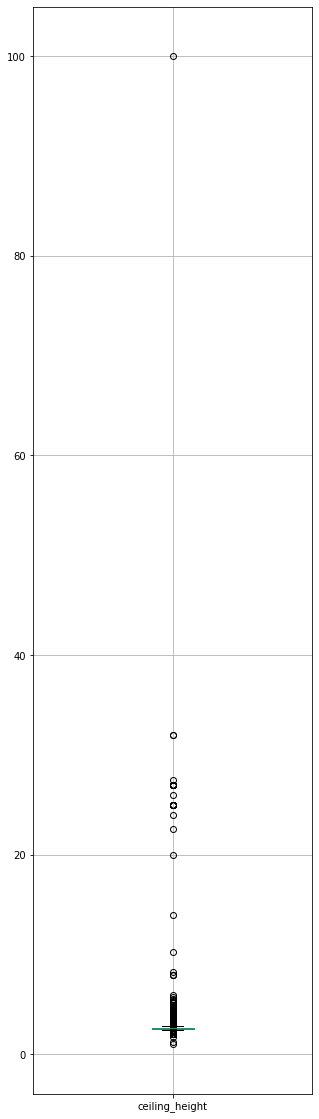

In [85]:
data.boxplot(column=['ceiling_height'], figsize=(5,20))

Выбросы очень большие, мешают восприятию всей диаграммы. Максимальное значение в этом столбце = 100, очевидно, что высота потолка такой быть не может. Предлагаю удалить строку с этим значением. 

In [86]:
data = data.query('ceiling_height != 100')

Теперь посмотрим на значения, превышающие 20 м.

In [87]:
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,8.4,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Можно предположить, что имела место ошибка: вместо 2.7 м пользователь ввел 27. Исправим данные.

In [88]:
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] = data[data['ceiling_height'] > 20]['ceiling_height'].apply(lambda x: x / 10)

Следующий подозрительный интервал: от 10 м до 20 м.

In [89]:
data.query('ceiling_height >= 10 and ceiling_height <= 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19,3,20.0,17,53.2,14,False,False,False,12.0,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,False,False,12.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Мы можем преобразовать эти данные аналогичным образом, но для этого сначала предлагаю посмотреть, есть ли у нас похожие значения в данных.

In [90]:
data.query('ceiling_height >= 1 and ceiling_height <= 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.50,6,False,False,False,6.50,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.00,4,False,False,False,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.60,9,False,False,False,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.50,1,False,False,False,5.20,0,поселок городского типа Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5,17.15,5,False,False,False,8.50,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17,15.20,12,False,False,False,10.10,0,поселок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5,63.90,2,False,False,False,12.00,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5,20.00,5,False,False,False,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.40,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04,3,2.00,5,46.00,1,False,False,False,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


Похожие значения есть, можем преобразовать.

In [91]:
data.loc[(data['ceiling_height'] >= 10) & (data['ceiling_height'] <= 20), 'ceiling_height'] = data[data['ceiling_height'] > 20]['ceiling_height'].apply(lambda x: x / 10)

In [92]:
data['ceiling_height'].describe()

count    23609.000000
mean         2.697769
std          0.232825
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

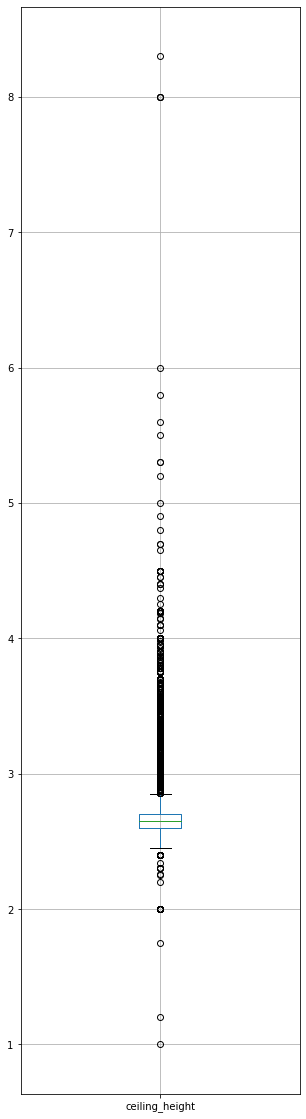

In [93]:
data.boxplot(column='ceiling_height', figsize=(5,20))

Диаграмма размаха выглядит более адекватно, но выбросы все равно есть, однако эти значения выглядят уже менее аномальными: можем предположить, что среди наших данных есть какие-то элитные квартиры с высокими потолками.

##### Аномальные значения в столбце `last_price`

Когда мы строили гистограммы, еще один столбец обратил на себя внимание: `last_price`. Изучим его подробнее.

In [94]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [95]:
data['last_price'].describe()

count       23612.00
mean      6540197.19
std      10901814.58
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64

<AxesSubplot:>

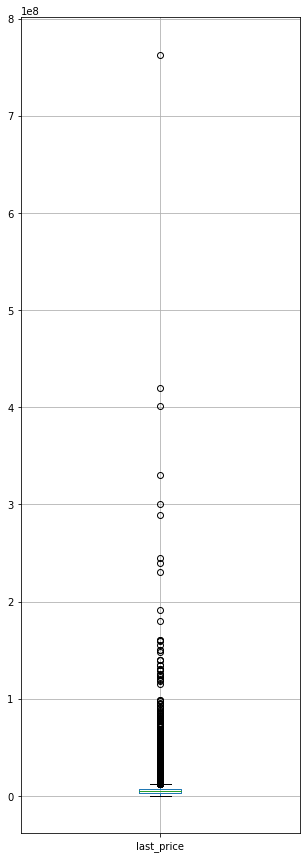

In [96]:
data.boxplot(column='last_price', figsize=(5, 15))

Посмотрим, что же за квартира продается за 763000000.

In [97]:
data.query('last_price == 763000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.00,400.00,2017-09-30,7,2.65,10,250.00,10,False,False,False,50.00,2,Санкт-Петербург,25108.00,3956.00,1.00,530.00,3.00,756.00,33.00


На диаграме размаха, в том виде, в котором она сейчас представлена, мы видим довольно длинный хвост из выбросов. Предлагаю отбросить все значения выше 100000000.

In [98]:
data = data.query('last_price < 100000000')

Посмотрим на новый боксплот.

<AxesSubplot:>

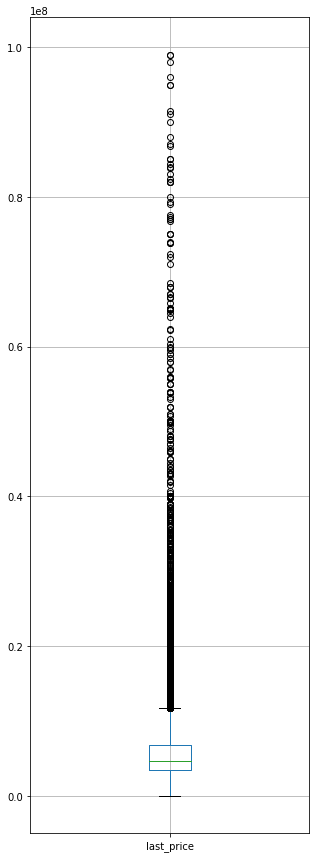

In [99]:
data.boxplot(column='last_price', figsize=(5, 15))

##### Аномальные значения в столбце `rooms`
Еще при заполнении пропусков было замечено, что в столбце `rooms` есть аномально большие значения.

In [100]:
data['rooms'].describe()

count   23575.00
mean        2.07
std         1.07
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

<AxesSubplot:>

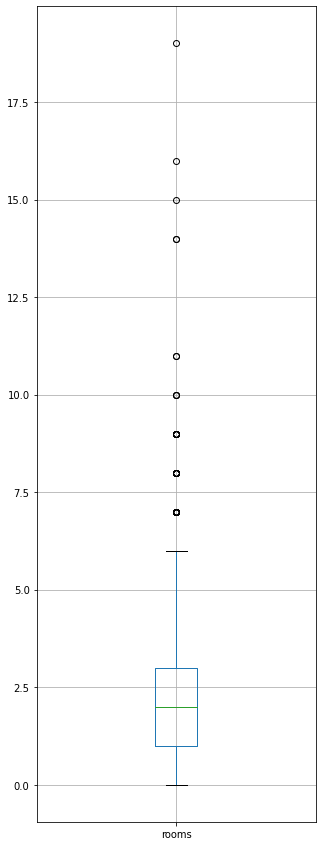

In [101]:
data.boxplot(column='rooms', figsize=(5, 15))

Предлагаю оставить в датафрейме только квартиры с 10 и менее комнатами.

In [102]:
data = data.query('rooms <= 10')

##### Выводы по аномальным значениям

Были изучены аномальные значения в столбцах `ceiling_height`, `last_price`, `rooms`. Мы выбрали именно эти столбцы, т.к. в них были заметны аномалии на предыдущих этапах предобработки данных.<br>
Выбросы в большую сторону в столбце `ceiling_height` были преобразовамы путем деления встретившегося аномально высокого значения на 10, т.к. было выдвинуто предположение, что имела место ошибка ввода данных.<br>
В столбце `last_price` были отброшены строки со значениями, превышающими 100000000.
В столбце `rooms` аномальными посчитали квартиры с количеством комнат, большим 10.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра
Цена одного квадратного метра находится путем деления данных из столбца `last_price` на данные из столбца `total_area`.

In [103]:
data['price_per_sqmeter'] = data['last_price'] / data['total_area']

In [104]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,54.00,9,False,False,False,15.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00


#### День недели публикации объявления 
(0 — понедельник, 1 — вторник и так далее)

In [105]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [106]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter,day_of_week
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,54.00,9,False,False,False,15.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1


#### Месяц публикации объявления

In [107]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [108]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter,day_of_week,month_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,54.00,9,False,False,False,15.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6


#### Год публикации объявления

In [109]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [110]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter,day_of_week,month_exposition,year_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,54.00,9,False,False,False,15.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018


#### Тип этажа квартиры 
(значения — «первый», «последний», «другой»)

In [111]:
def floor_type(row):
    '''
    Функция получает на вход строку датафрейма и возвращает соответствующий тип этажа квартиры
    '''
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [112]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [113]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter,day_of_week,month_exposition,year_exposition,floor_type
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,54.00,9,False,False,False,15.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой


#### Расстояние до центра города в километрах
(переведите из м в км и округлите до целых значений)

In [114]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

In [115]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter,day_of_week,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,54.00,9,False,False,False,15.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


### Проведите исследовательский анализ данных

#### Общая площадь
Изучим параметр `total_area`.

In [116]:
data['total_area'].describe()

count   23568.00
mean       59.84
std        33.09
min        12.00
25%        40.00
50%        52.00
75%        69.50
max       517.00
Name: total_area, dtype: float64

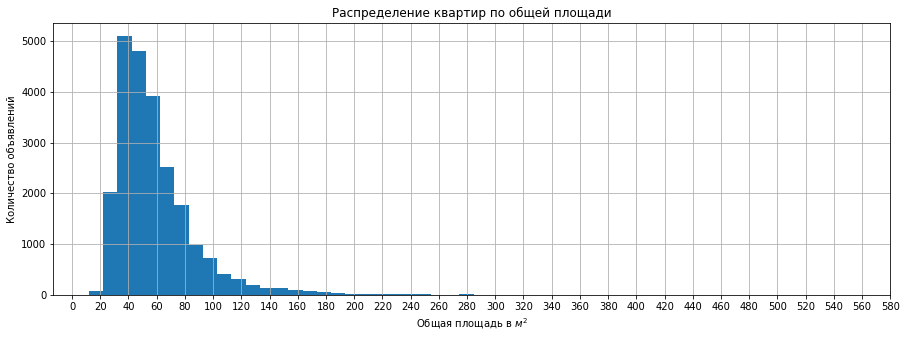

In [117]:
data.hist(column='total_area',bins=50, figsize=(15, 5))
plt.xticks(np.arange(0, 600, step=20))
plt.title('Распределение квартир по общей площади')
plt.xlabel('Общая площадь в $м^2$')
plt.ylabel('Количество объявлений')
plt.show()

Медианное значение общей площади равно 52 квадратным метрам. Пик значений приходится на интервал от 35 до 45 квадратных метров.

#### Жилая площадь
Изучим параметр `living_area`.

In [118]:
data['living_area'].describe()

count   23568.00
mean       34.20
std        20.79
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       347.50
Name: living_area, dtype: float64

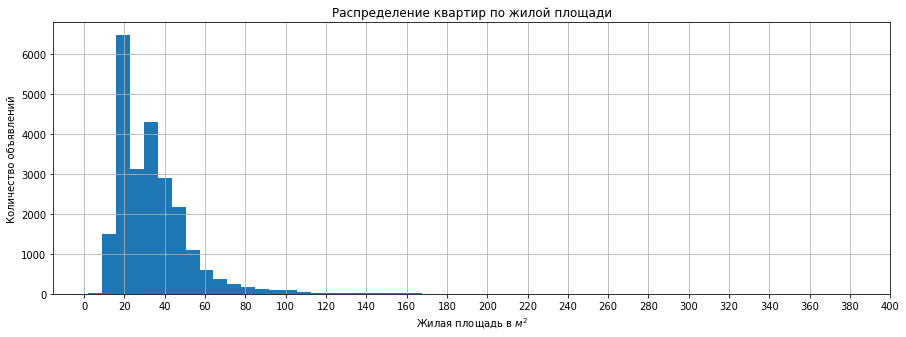

In [119]:
data.hist(column='living_area',bins=50, figsize=(15, 5))
plt.xticks(np.arange(0, 410, step=20))
plt.title('Распределение квартир по жилой площади')
plt.xlabel('Жилая площадь в $м^2$')
plt.ylabel('Количество объявлений')
plt.show()

Медианной значение жилой площади равно 30 квадратных метров. На гистограмме видно два пика значений: в районе 20 квадратных метров и в диапазоне от 29 до 35 квадратных метров.

#### Площадь кухни
Изучим параметр `kitchen_area`.

In [120]:
data['kitchen_area'].describe()

count   23355.00
mean       10.45
std         5.63
min         1.30
25%         7.00
50%         9.00
75%        11.92
max       107.00
Name: kitchen_area, dtype: float64

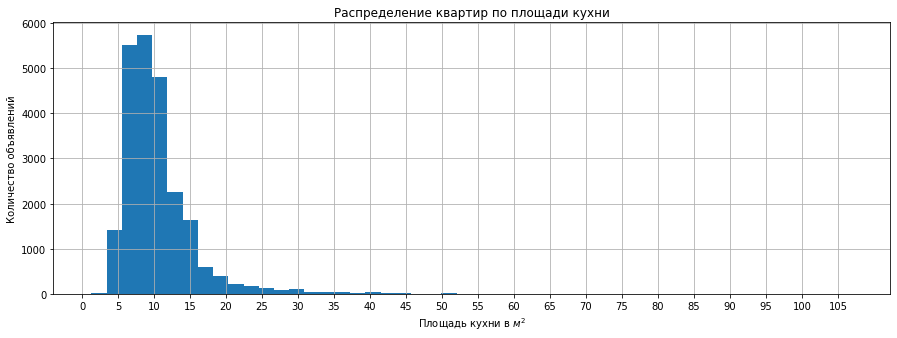

In [121]:
data.hist(column='kitchen_area',bins=50, figsize=(15, 5))
plt.xticks(np.arange(0, 110, step=5))
plt.title('Распределение квартир по площади кухни')
plt.xlabel('Площадь кухни в $м^2$')
plt.ylabel('Количество объявлений')
plt.show()


Медианное значение площади кухни равно 9 квадратных метров. На гистограмме виден один пик в диапазоне 7-9 квадратных метров.

#### Цена объекта
Изучим параметр `last_price`.

In [122]:
data['last_price'].describe()

count      23568.00
mean     6241184.51
std      6407313.92
min        12190.00
25%      3400000.00
50%      4622500.00
75%      6750000.00
max     99000000.00
Name: last_price, dtype: float64

Создадим вспомогательную колонку с ценой в миллионах.

In [123]:
data['last_price_in_M'] = data['last_price'] / 1000000

In [124]:
data['last_price_in_M'].describe()

count   23568.00
mean        6.24
std         6.41
min         0.01
25%         3.40
50%         4.62
75%         6.75
max        99.00
Name: last_price_in_M, dtype: float64

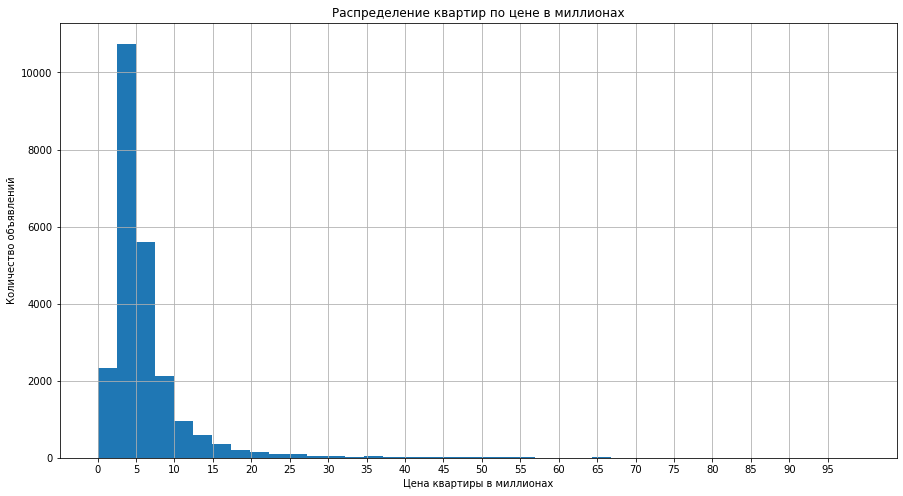

In [125]:
data.hist(column='last_price_in_M', bins=40, figsize=(15, 8))
plt.xticks(np.arange(0, 100, step=5))
plt.title('Распределение квартир по цене в миллионах')
plt.xlabel('Цена квартиры в миллионах')
plt.ylabel('Количество объявлений')
plt.show()

Медианное значение равно 4622500. На гистограмме виден пик значений в диапазоне от 2500000 до 5000000 рублей.

#### Количество комнат
Изучим параметр `rooms`.

In [126]:
data['rooms'].describe()

count   23568.00
mean        2.06
std         1.05
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        10.00
Name: rooms, dtype: float64

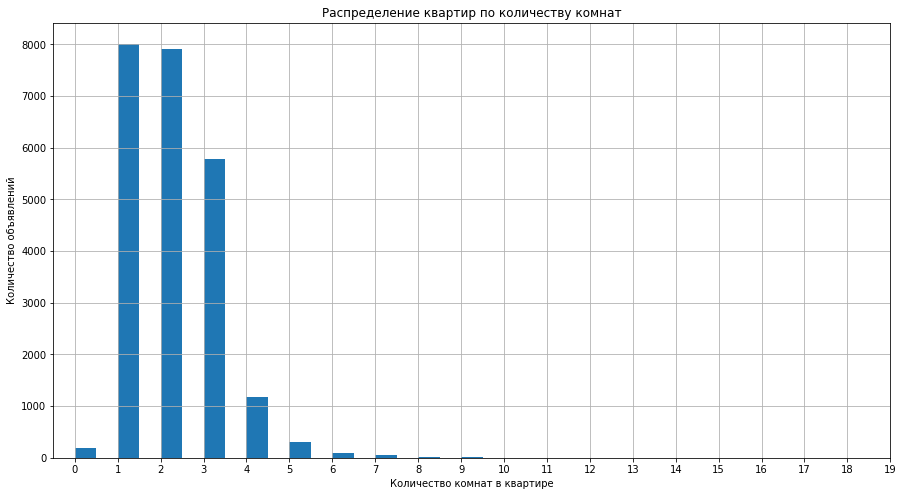

In [127]:
data.hist(column='rooms', bins=20, figsize=(15, 8))
plt.xticks(np.arange(0, 20, step=1))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Количество объявлений')
plt.show()

Медианное значение количества комнат равно 2. Большиснтво значений находятся в диапазоне 1-3 комнаты.

#### Высота потолков
Изучим параметр `ceiling_height`.

In [128]:
data['ceiling_height'].describe()

count   23565.00
mean        2.70
std         0.23
min         1.00
25%         2.60
50%         2.65
75%         2.70
max         8.30
Name: ceiling_height, dtype: float64

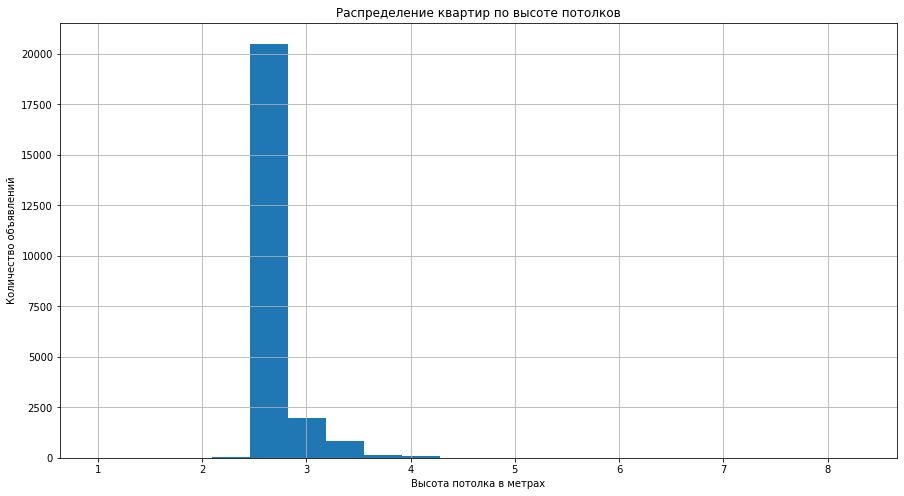

In [129]:
data.hist(column='ceiling_height', bins=20, figsize=(15, 8))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолка в метрах')
plt.ylabel('Количество объявлений')
plt.show()

Медианное значение высоты потолков равно 2.65 метров. На гистограмме виден пик в диапазоне от 2.5 м до 2.8 м.

#### Этаж квартиры
Изучим параметр `floor`.

In [130]:
data['floor'].describe()

count   23568.00
mean        5.88
std         4.88
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

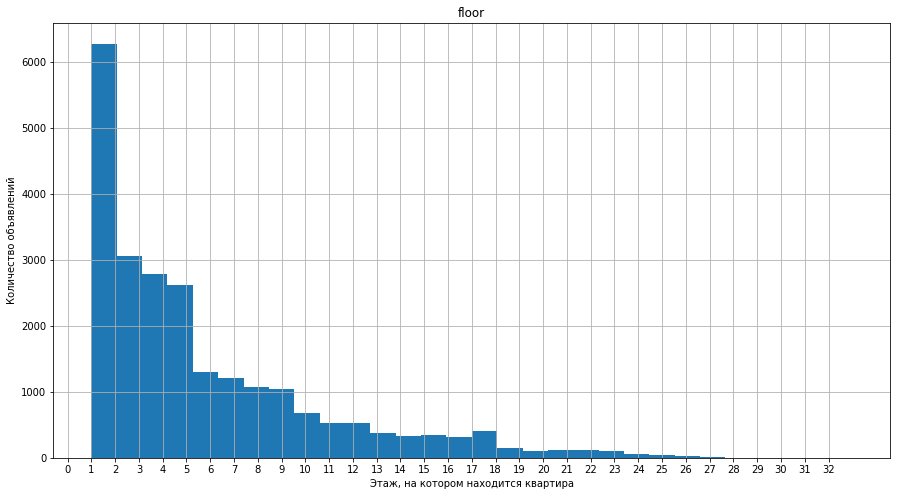

In [131]:
data.hist(column='floor',bins=30,figsize=(15, 8))
plt.xticks(np.arange(0, 33, step=1))
plt.xlabel('Этаж, на котором находится квартира')
plt.ylabel('Количество объявлений')
plt.show()

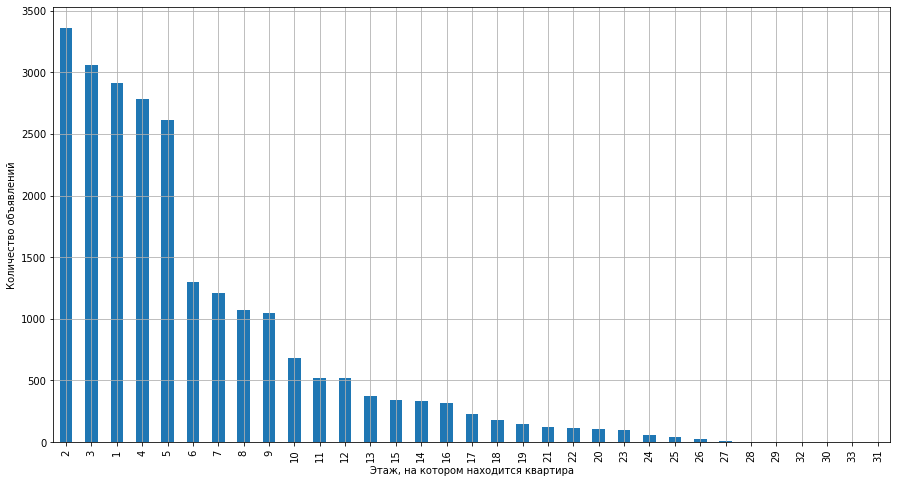

In [132]:
data['floor'].value_counts().plot(kind='bar', grid=True, figsize=(15, 8))
plt.xlabel('Этаж, на котором находится квартира')
plt.ylabel('Количество объявлений')
plt.show()

Медианное значение равно 4. На гистограмме виден пик в диапазоне от 1 до 2 этажей. На гистограмме и столбчатой диаграмме видно, что больше всего квартир находится на 1-5 этажах (больше всего на втором этаже).

#### Тип этажа квартиры («первый», «последний», «другой»)
Изучим параметр `floor_type`.

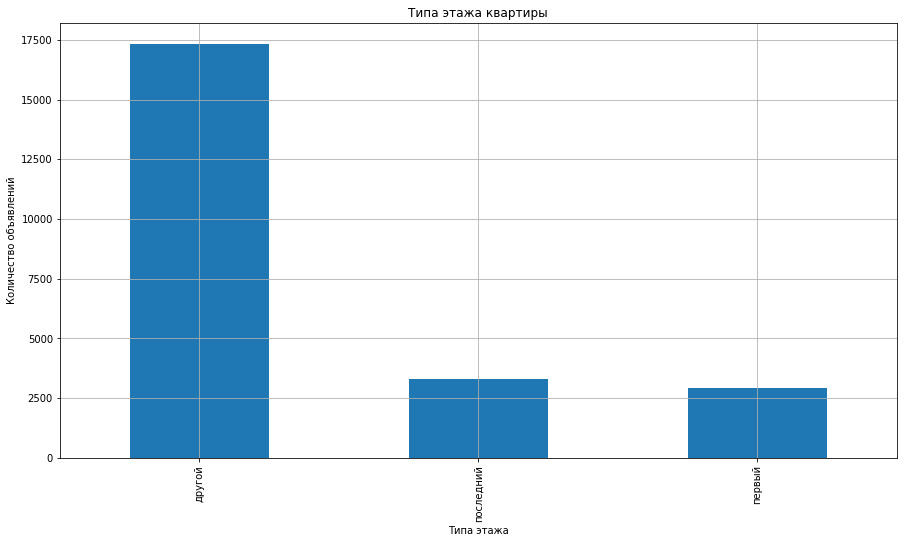

In [133]:
data['floor_type'].value_counts().plot(kind='bar', grid=True, figsize=(15, 8))
plt.title('Типа этажа квартиры')
plt.xlabel('Типа этажа')
plt.ylabel('Количество объявлений')
plt.show()

Видим, что больше всего квартир расположено на этажах, отличных от первого и последнего. Квартир на последнем этаже чуть больше, чем квартир на первом этаже.

#### Общее количество этажей в доме
Изучим параметр `floors_total`.

In [134]:
data['floors_total'].describe()

count   23568.00
mean       10.68
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

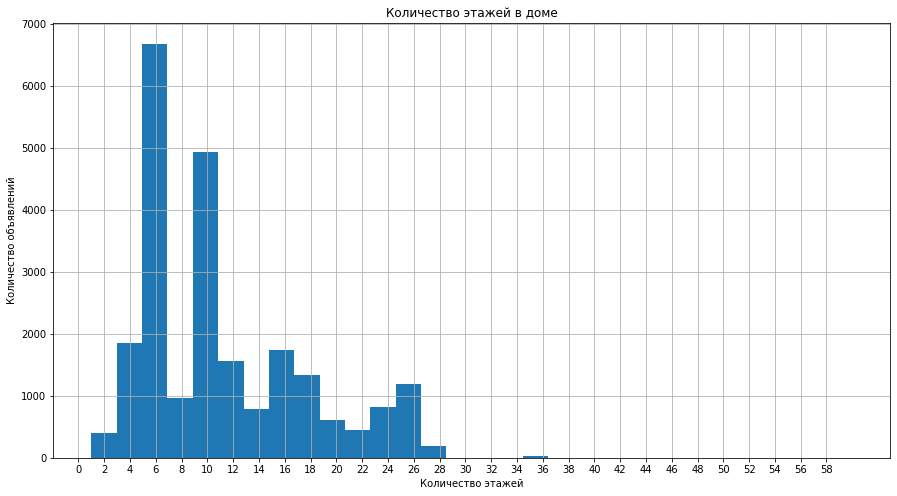

In [135]:
data.hist(column='floors_total',bins=30, figsize=(15, 8))
plt.xticks(np.arange(0, 60, step=2))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

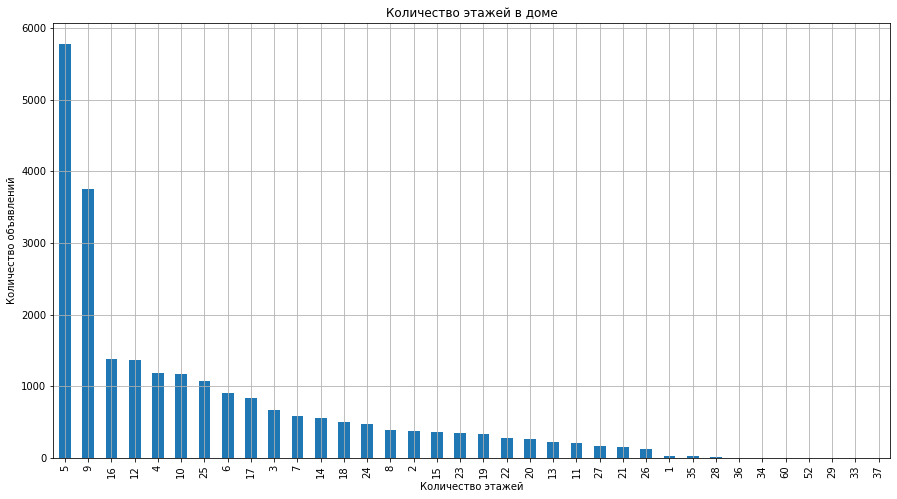

In [136]:
data['floors_total'].value_counts().plot(kind='bar', grid=True, figsize=(15, 8))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

Медианное значение общего количества этажей в доме равно 9. Среднее значение равно 10.68. На гистограмме есть два пика: первый пик в диапазоне от 5 до 7 этажей, второй пик в диапазоне от 7 до 11 этажей. На столбчатой диаграмме видим, что на самом деле самыми частотными являются пятиэтажные и девятиэтажные дома.

#### Расстояние до центра города в метрах
Изучим параметр `cityCenters_nearest`.

In [137]:
data['cityCenters_nearest'].describe()

count   18060.00
mean    14209.26
std      8610.01
min       181.00
25%      9266.50
50%     13107.00
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

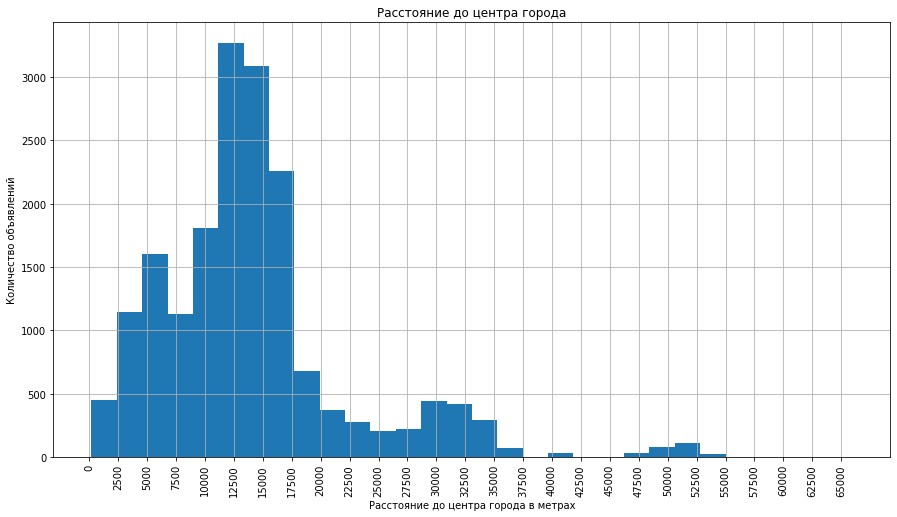

In [138]:
data.hist(column='cityCenters_nearest',bins=30, figsize=(15, 8))
plt.xticks(np.arange(0, 66000, step=2500), rotation='vertical')
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество объявлений')
plt.show()

Среднее расстояние до центра города равно 14209.26 метров. Медианное расстояние равно 13107 метров. На гистограмме виден пик в районе 12500 метров.

#### Расстояние до ближайшего аэропорта
Изучим параметр `airports_nearest`.

In [139]:
data['airports_nearest'].describe()

count   18037.00
mean    28794.04
std     12638.88
min         0.00
25%     18557.00
50%     26752.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

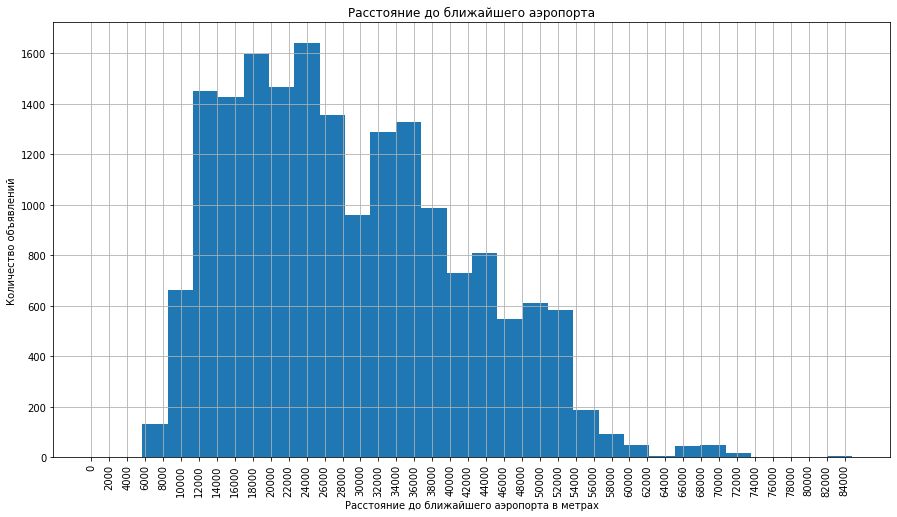

In [140]:
data.hist(column='airports_nearest',bins=30, figsize=(15, 8))
plt.xticks(np.arange(0, 85000, step=2000), rotation='vertical')
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта в метрах')
plt.ylabel('Количество объявлений')
plt.show()

Медианное расстояние до аэропорта равно 26752 м, среднее расстояние равно 28794.04 метров. На гистограмме виден пик в районе 24000 м и в районе 18000 м.

#### Расстояние до ближайшего парка
Изучим параметр `parks_nearest`.

In [141]:
data['parks_nearest'].describe()

count   8014.00
mean     490.84
std      341.76
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

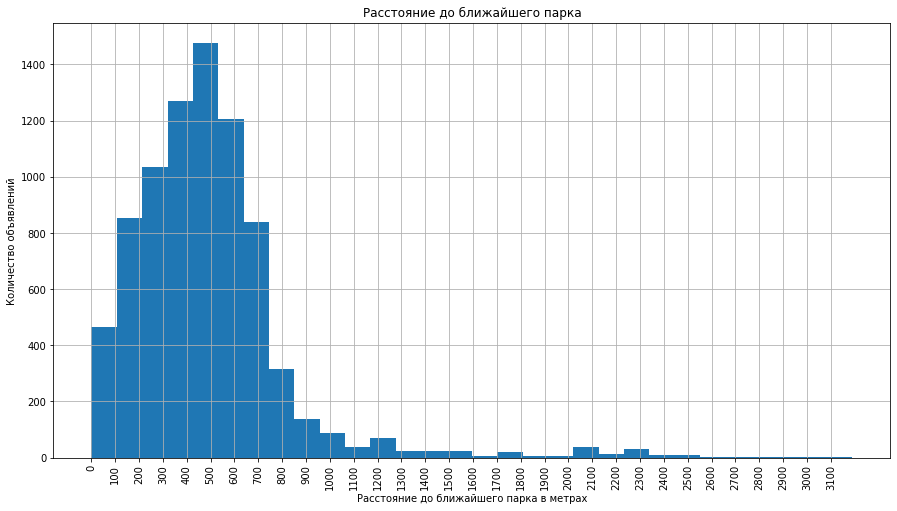

In [142]:
data.hist(column='parks_nearest',bins=30, figsize=(15, 8))
plt.xticks(np.arange(0, 3200, step=100), rotation='vertical')
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество объявлений')
plt.show()

Среднее расстояние до ближайшего парка равно 490.84 метров, медианное расстояние равно 455 метров. На гистограмме виден пик в районе тех же значений.

#### День и месяц публикации объявления

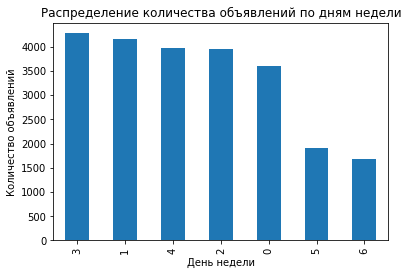

In [143]:
data['day_of_week'].value_counts().plot(kind='bar')
plt.title('Распределение количества объявлений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

Люди реже публикуют объявления по выходным. Видимо, предпочитают отдыхать. Чаще всего объявления публикуются в четверг, но разница с остальными днями недели незначительная.

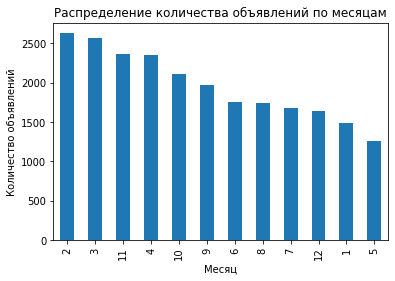

In [144]:
data['month_exposition'].value_counts().plot(kind='bar')
plt.title('Распределение количества объявлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

Чаще всего объявления публиковались в феврале и марте, реже всего - в мае и январе. Возможно, длинные январские и майские праздники, как и выходные дни, не мотивируют людей продавать квартиры, хотя стоит отметить, что в феврале и марте тоже есть праздники.

#### Скорость продажи квартир
Изучим столбец `days_exposition`.

In [145]:
data['days_exposition'].describe()

count   20402.00
mean      180.56
std       219.34
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Среднее значение равно 156 дням, в то время как медианное значение равно 73 дням. Это свидетельствует о том, что у данных большой размах, что также хорошо видно по значению стандартного отклонения. Стоит иметь в виду, что минимальное значение, равное нулю, были проставлены нами раньше на этапе обработки пропусков.

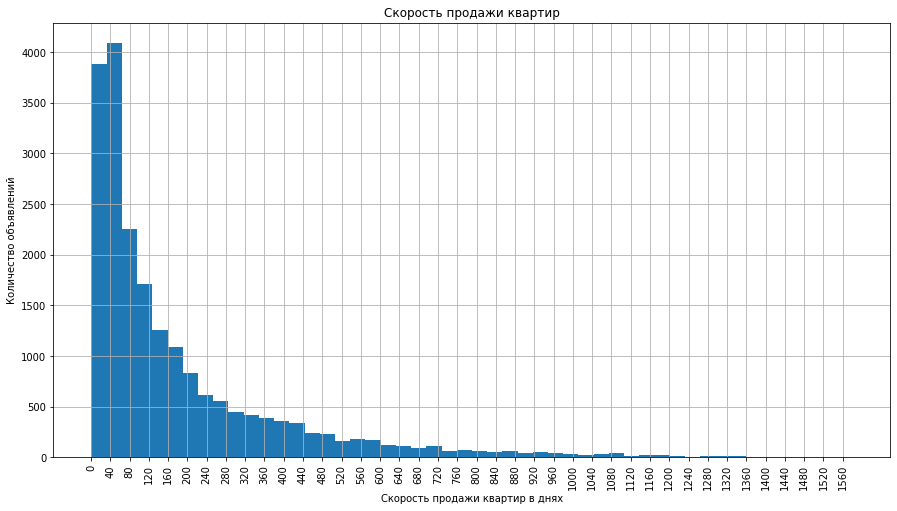

In [146]:
data.hist(column='days_exposition',bins=50, figsize=(15, 8))
plt.xticks(np.arange(0, 1580, step=40), rotation='vertical')
plt.title('Скорость продажи квартир')
plt.xlabel('Скорость продажи квартир в днях')
plt.ylabel('Количество объявлений')
plt.show()

Продажа обычно занимает до 73 дней (медианное значение). На гистограмме пик продаж совершается до 40-45 дней. Необычно долгими можно считать значения более 198 дней (Q3). На гистограмме наблюдается падение уже в районе 80 дней.

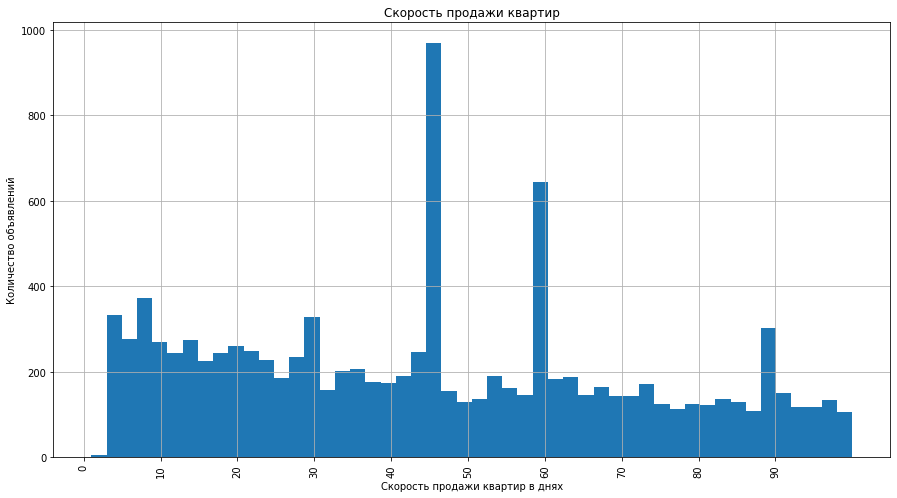

In [147]:
data[data['days_exposition'] <= 100].hist(column='days_exposition',bins=50, figsize=(15, 8))
plt.xticks(np.arange(0, 100, step=10), rotation='vertical')
plt.title('Скорость продажи квартир')
plt.xlabel('Скорость продажи квартир в днях')
plt.ylabel('Количество объявлений')
plt.show()

Есть пики на 45 днях и 60 днях, т.е. полтора и два месяца. Это особенность функционирования системы размещения объявлений.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

##### Зависимость стоимости от общей площади

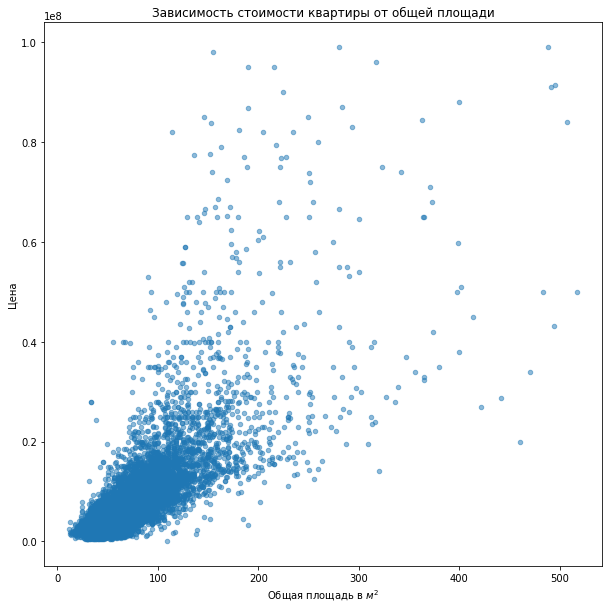

In [148]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(10, 10), alpha=0.5)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Общая площадь в $м^2$')
plt.ylabel('Цена')
plt.show()

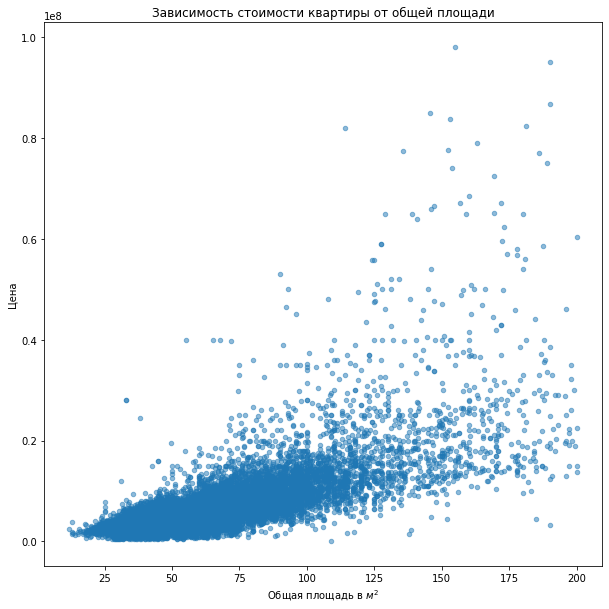

In [149]:
data.query('total_area <= 200').plot(x='total_area', y='last_price', kind='scatter', figsize=(10, 10), alpha=0.5)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Общая площадь в $м^2$')
plt.ylabel('Цена')
plt.show()

Прослеживается тенденция к тому, что с увеличением общей площади, увеличивается цена.<br>
Проверим этот вывод, рассчитав коэффициент корреляции.

In [150]:
data['last_price'].corr(data['total_area'])

0.768325835986276

Корреляция действительно есть и довольно сильная.

##### Зависимость стоимости от жилой площади

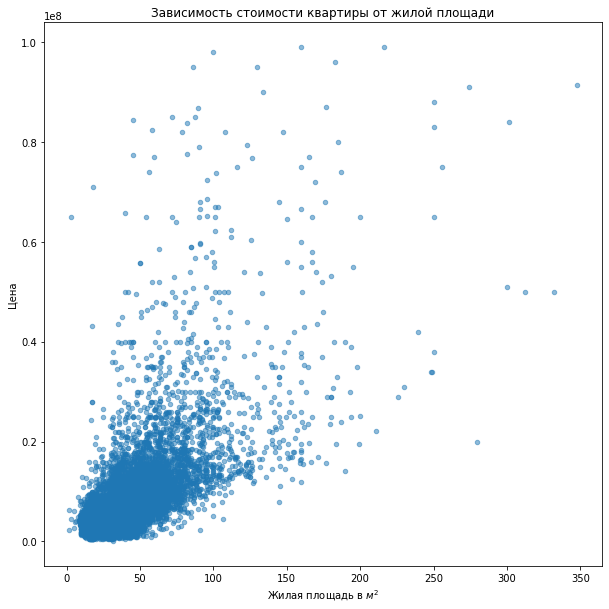

In [151]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(10, 10), alpha=0.5)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('Жилая площадь в $м^2$')
plt.ylabel('Цена')
plt.show()

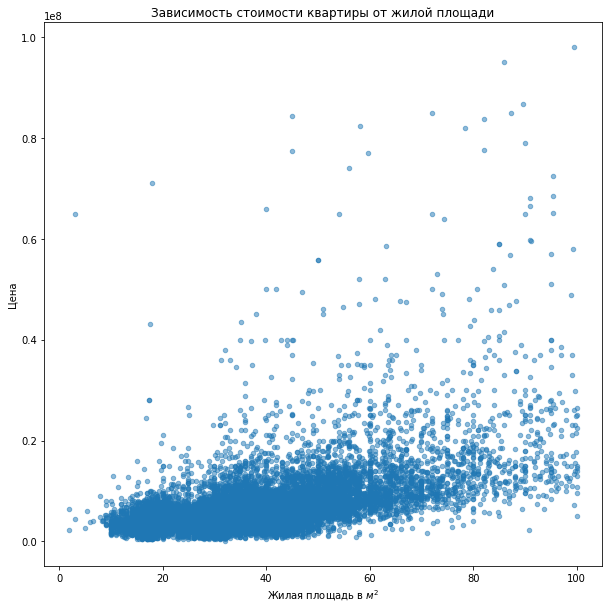

In [152]:
data.query('living_area <= 100').plot(x='living_area', y='last_price', kind='scatter', figsize=(10, 10), alpha=0.5)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('Жилая площадь в $м^2$')
plt.ylabel('Цена')
plt.show()

Прослеживается тенденция к увеличению цены с увеличением жилой площади, но меньше, чем в случае с общей площадью.<br>
Проверим наше заключение, рассичтав коэффициент корреляции.

In [153]:
data['last_price'].corr(data['living_area'])

0.6733932558158593

Все верно.

##### Зависимость стоимости от площади кухни

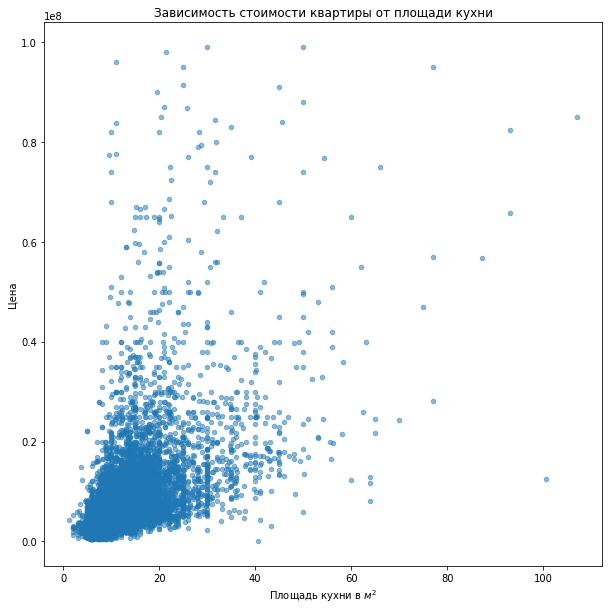

In [154]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10, 10), alpha=0.5)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('Площадь кухни в $м^2$')
plt.ylabel('Цена')
plt.show()

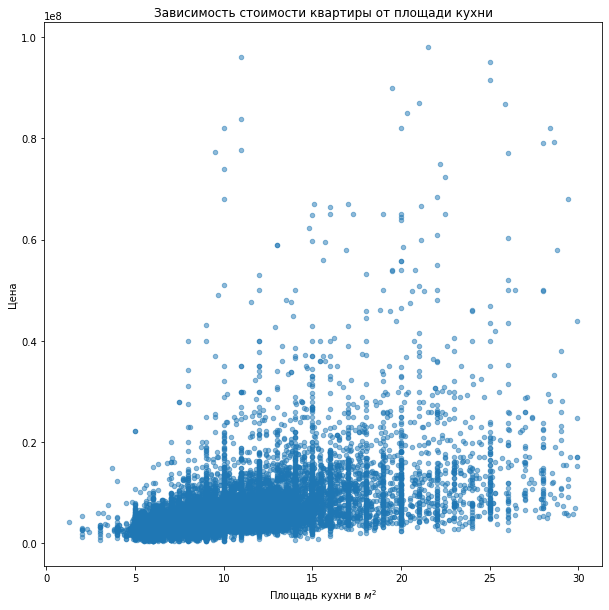

In [155]:
data.query('kitchen_area < 30').plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10, 10), alpha=0.5)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('Площадь кухни в $м^2$')
plt.ylabel('Цена')
plt.show()

Прослеживается тенденция к увеличению цены с увеличением площади кухни. Судя по графику, зависимость еще меньше, чем в прошлом пункте. Проверим числовое значение.

In [156]:
data['last_price'].corr(data['kitchen_area'])

0.5842083616633259

##### Зависимость стоимости от количества комнат

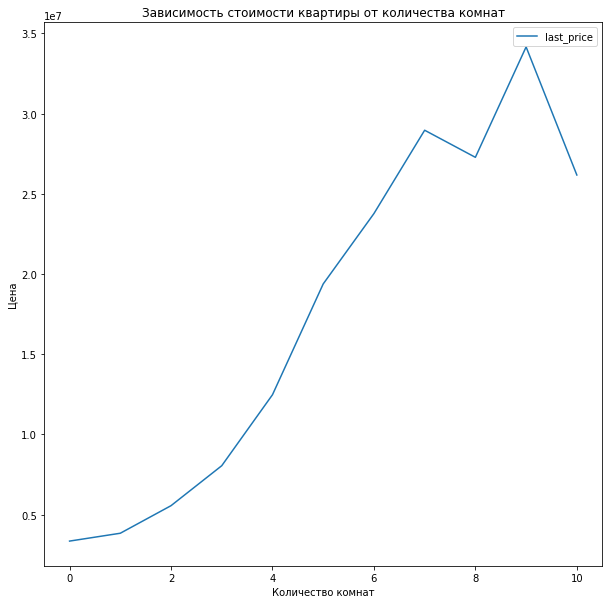

In [157]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(figsize=(10, 10))
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

График показывает, что средняя цена увеличивается при увеличении количества комнат в квартире.

In [158]:
data['last_price'].corr(data['rooms'])

0.4689062154354755

Коэффициент корреляции также указывает на наличие зависимости.

##### Зависимость стоимости от типа этажа, на котором расположена квартира

In [159]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')

,last_price
floor_type,
другой,6470094.53
первый,4761004.86
последний,6344643.11


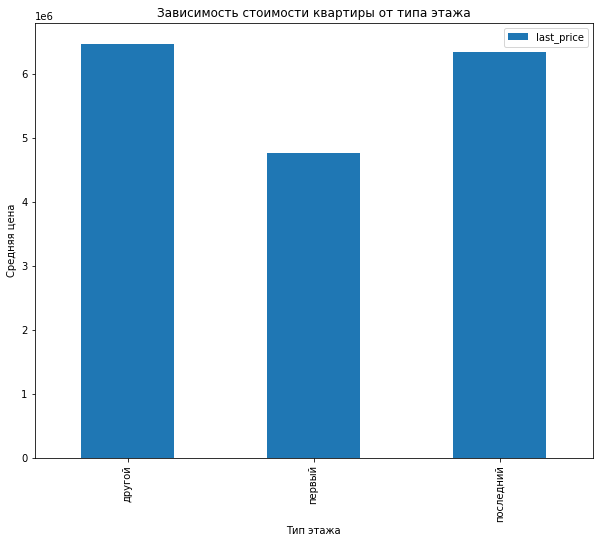

In [160]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10,8))
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
plt.show()

Средняя цена квартир на первом этаже ниже, чем на остальных этажах.

##### Зависимость стоимости от даты размещения (день недели, месяц, год)

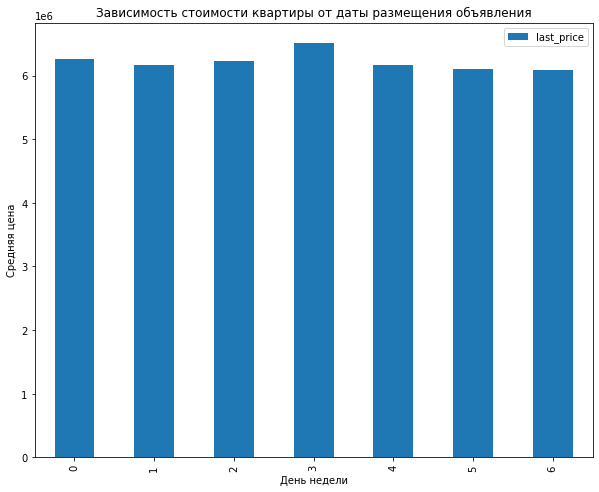

In [161]:
data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10,8))
plt.title('Зависимость стоимости квартиры от даты размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.show()

Не наблюдается зависимости от дня недели.

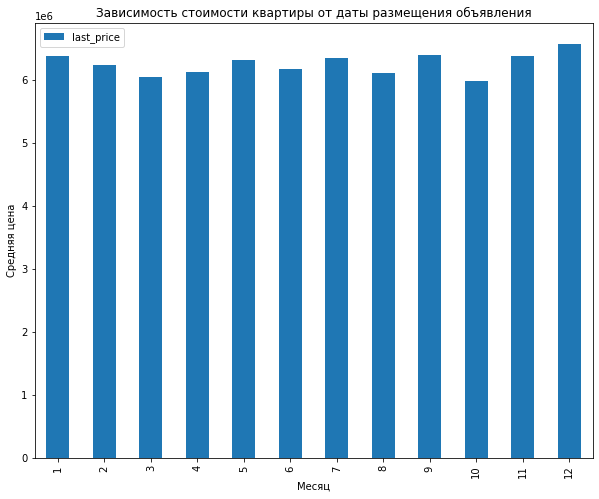

In [162]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10,8))
plt.title('Зависимость стоимости квартиры от даты размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.show()

Не наблюдается зависимости от месяца размещения объявления.

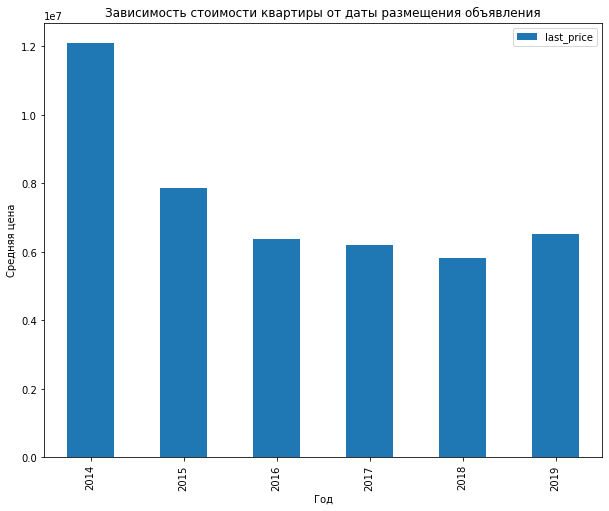

In [163]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10,8))
plt.title('Зависимость стоимости квартиры от даты размещения объявления')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.show()

Неожиданно, в 2014 году цены на недвижимость были выше.

##### Попарный коэффициент корреляции

In [164]:
data[['last_price', 'total_area', 'living_area',  'kitchen_area', 'rooms', 'day_of_week', 'month_exposition', 'year_exposition']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_of_week,month_exposition,year_exposition
last_price,1.00,0.77,0.67,0.58,0.47,-0.00,0.01,-0.05
total_area,0.77,1.00,0.92,0.59,0.77,-0.01,0.01,-0.08
living_area,0.67,0.92,1.00,0.41,0.85,-0.01,0.00,-0.08
kitchen_area,0.58,0.59,0.41,1.00,0.25,-0.01,0.01,-0.06
rooms,0.47,0.77,0.85,0.25,1.00,-0.01,-0.00,-0.05
day_of_week,-0.00,-0.01,-0.01,-0.01,-0.01,1.00,0.01,-0.00
month_exposition,0.01,0.01,0.00,0.01,-0.00,0.01,1.00,-0.27
year_exposition,-0.05,-0.08,-0.08,-0.06,-0.05,-0.00,-0.27,1.00


##### Вывод

Рассмотренные параметры можно упорядочить следующим образом по уменьшению влияния на общую цену:
1. общая площадь (коэффициент корреляции = 0.77);
2. жилая площадь (коэффициент корреляции = 0.67);
3. площадь кухни (коэффициент корреляции = 0.58);
4. количество комнат (коэффициент корреляции = 0.47).
5. тип этажа, на котором расположена квартира (квартиры на первом этаже имеют тенденцию быть дешевле).

Даты размещения (день недели, месяц, год) не влияют на цену.

Стоит, однако, иметь в виду, что параметры 1-4 также сильно коррелируют друг с другом.

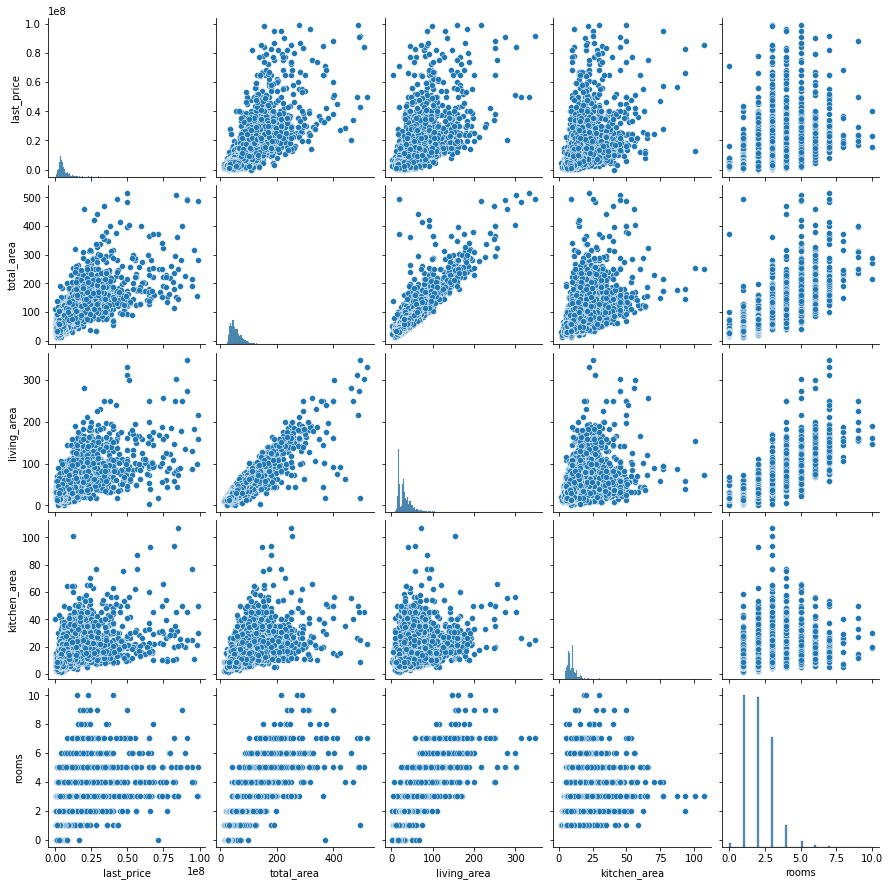

In [165]:
sns.pairplot(data[['last_price', 'total_area', 'living_area',  'kitchen_area', 'rooms']]);

#### Средняя цена за квадратный метр в 10 населенных пунктах с наибольшим числом объявлений
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.

In [166]:
top10_localities = list(data['locality_name'].value_counts().head(10).index)

In [167]:
data[data['locality_name'].isin(top10_localities)].pivot_table(index='locality_name', values='price_per_sqmeter', aggfunc='mean')

,price_per_sqmeter
locality_name,
Всеволожск,68654.47
Выборг,58141.91
Гатчина,68746.15
Колпино,75424.58
Пушкин,103125.82
Санкт-Петербург,113582.80
деревня Кудрово,92473.55
поселок Мурино,85629.57
поселок Парголово,90175.91


Самая высокая цена за квадратный метр в Санкт-Петербурге (113582.80) и Пушкине (103125.82). Самая низкая цена в Выборге (58141.91).

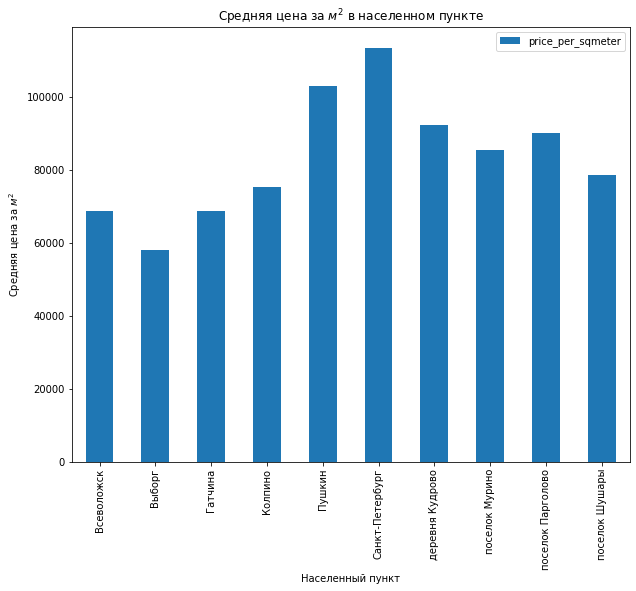

In [168]:
data[data['locality_name'].isin(top10_localities)].pivot_table(index='locality_name', values='price_per_sqmeter', aggfunc='mean').plot(kind='bar', figsize=(10,8))
plt.title('Средняя цена за $м^2$ в населенном пункте')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена за $м^2$')
plt.show()

#### Зависимость стоимости от расстояния до центра города
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [169]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_per_sqmeter', aggfunc='mean')

,price_per_sqmeter
cityCenters_nearest_km,
0.00,231767.96
1.00,154961.95
2.00,148364.75
3.00,121583.46
4.00,128477.43
5.00,137515.40
6.00,146045.23
7.00,153123.33
8.00,124366.17


Можно увидеть тенденцию к уменьшению цены за 1 квадратный метр, чем дальше объект расположен от центра города.

### Общий вывод

Мы изучили данные, полученные из объявлений о продаже недвижимости в санкт-Петербурге и Ленинградской области. <br>
Сначала была проведена предобработка данных: были заполнены пропущенные значения, изменены типы данных в некоторых колонках, удалены неявные дубликаты в колонке `locality_name`, почищены аномалии в данных. <br>
Затем мы добавили в таблицу новые столбцы: `price_per_sqmeter` (цена за квадратный метр), `day_of_week` (день недели публикации объявления), `month_exposition` (месяц публикации объявления), `year_exposition` (год публикации объявления), `floor_type` (тип этажа), `cityCenters_nearest_km` (расстояние до центра города в километрах).<br>
Далее мы провели исследовательский анализ данных, изучили данные в разных колонках, средние значения, медианные значения, самые частотные значения.<br>
Мы исследовали зависимость цены объекта недвижимости от различных факторов. Было установлено, что общая площадь, жилая площадь, площадь кухни и количество комнат влияют на цену, в то время как дата размещения не влияет.
1. общая площадь (коэффициент корреляции = 0.77);
2. жилая площадь (коэффициент корреляции = 0.67);
3. площадь кухни (коэффициент корреляции = 0.58);
4. количество комнат (коэффициент корреляции = 0.47).

Также мы продемонстрирвали, что в Санкт-Петербурге и Пушкине самые высокие средние цены за квадратный метр (113582.80 и 103125.82 соответственно). Самая низкая цена за квадратный метр оказалась в Выборге (58141.91).<br>
Кроме того, мы показали, что удаленность от центра города влияет на цену объекта недвижимости: чем объект дальше от центра, тем дешевле квадратный метр.